In [113]:
import os
import numpy as np
import pandas as pd

# set static variables
dir_str = os.getcwd()
file_n = "/admission2.csv"
id_str = 'userID'
# colors
custom_palette = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33"]
edu_col_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad']

def hex_to_rgb(hex_value):
    h = hex_value.lstrip('#')
    return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

def plotscat(data, ncls,dataX):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(30,20))
    sns.scatterplot(x = data['IAT'], y= data['self'], hue=data['Labels'], style= data['edu'],
                    style_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad'],
                    markers = {'HighO': '.', 'High': 'o', 'UnivO': '^', 'Univ': 's',
                                'GradO': 'P', 'Grad': '*'},
                    palette=cus_palette[0:ncls], legend = False,
                    ax = ax1)
    sns.scatterplot(x = data['IAT'], y = data['HPC'], hue=data['Labels'], style= data['edu'],
                    style_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad'],
                    markers = {'HighO': '.', 'High': 'o', 'UnivO': '^', 'Univ': 's',
                                'GradO': 'P', 'Grad': '*'},
                    palette=cus_palette[0:ncls], legend = False,
                    ax = ax2)
    sns.scatterplot(x = data['IAT'], y = data['perf'], hue=data['Labels'], style= data['edu'],
                    style_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad'],
                    markers = {'HighO': '.', 'High': 'o', 'UnivO': '^', 'Univ': 's',
                                'GradO': 'P', 'Grad': '*'},
                    palette=cus_palette[0:ncls], legend = False,
                    ax = ax3)
    sns.scatterplot(x = data['self'], y = data['HPC'], hue=data['Labels'], style= data['edu'],
                    style_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad'],
                    markers = {'HighO': '.', 'High': 'o', 'UnivO': '^', 'Univ': 's',
                                'GradO': 'P', 'Grad': '*'},
                    palette=cus_palette[0:ncls], legend = False,
                    ax = ax4)
    sns.scatterplot(x = data['self'], y = data['HPC'], hue=data['Labels'], style= data['edu'],
                    style_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad'],
                    markers = {'HighO': '.', 'High': 'o', 'UnivO': '^', 'Univ': 's',
                                'GradO': 'P', 'Grad': '*'},
                    palette=cus_palette[0:ncls], legend = False,
                    ax = ax5)
    sns.scatterplot(x = data['HPC'], y = data['perf'], hue=data['Labels'], style= data['edu'],
                    style_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad'],
                    markers = {'HighO': '.', 'High': 'o', 'UnivO': '^', 'Univ': 's',
                                'GradO': 'P', 'Grad': '*'},
                    palette=cus_palette[0:ncls],
                    ax = ax6)
    handles, labels = ax6.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', fontsize = 'x-large',
                ncol = len(dataX.columns))
    ax6.get_legend().remove()
    ax1.xaxis.get_label().set_fontsize(20)
    ax2.xaxis.get_label().set_fontsize(20)
    ax3.xaxis.get_label().set_fontsize(20)
    ax4.xaxis.get_label().set_fontsize(20)
    ax5.xaxis.get_label().set_fontsize(20)
    ax6.xaxis.get_label().set_fontsize(20)
    ax1.yaxis.get_label().set_fontsize(20)
    ax2.yaxis.get_label().set_fontsize(20)
    ax3.yaxis.get_label().set_fontsize(20)
    ax4.yaxis.get_label().set_fontsize(20)
    ax5.yaxis.get_label().set_fontsize(20)
    ax6.yaxis.get_label().set_fontsize(20)
    ax1.tick_params(labelsize=15)
    ax2.tick_params(labelsize=15)
    ax3.tick_params(labelsize=15)
    ax4.tick_params(labelsize=15)
    ax5.tick_params(labelsize=15)
    ax6.tick_params(labelsize=15)
    plt.show()

cus_palette = list(map(hex_to_rgb, custom_palette))

Read data

In [114]:

# read data
data_str = dir_str + file_n
df = pd.read_csv(data_str, header = 0)
df.drop(id_str, axis = 1, inplace = True)

# numerical features & check if NaNs exist
types = df.dtypes
nums_i = (types == int)|(types == float)
nums = df.loc[:,nums_i]
print(nums.describe())
print("Number of NAs for numerical values:")
print(pd.isnull(nums).sum())

# non-numerical features & check if NaNs exist
n_nums = df.loc[:,~nums_i]
n_nums_cols = list(n_nums.columns)
print(n_nums.describe())
print("Number of NAs for non-numerical values:")
print(pd.isnull(n_nums).sum())

               age          IAT         self          HPC         perf
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     28.484000    29.050000     3.000000    10.532000    53.094000
std       5.632537     6.303748     1.414921     3.484411     2.819062
min      20.000000    15.000000     1.000000     5.000000    44.000000
25%      25.000000    25.000000     2.000000     8.000000    51.000000
50%      27.000000    30.000000     3.000000    10.000000    53.000000
75%      31.000000    33.000000     4.000000    13.000000    55.000000
max      50.000000    45.000000     5.000000    20.000000    62.000000
Number of NAs for numerical values:
age     0
IAT     0
self    0
HPC     0
perf    0
dtype: int64
         sex   edu  major  work
count   1000  1000   1000  1000
unique     2     6      2     2
top        M  Univ  False  True
freq     510   471    911   705
Number of NAs for non-numerical values:
sex      0
edu      0
major    0
work     0
dtype: int64


EDA

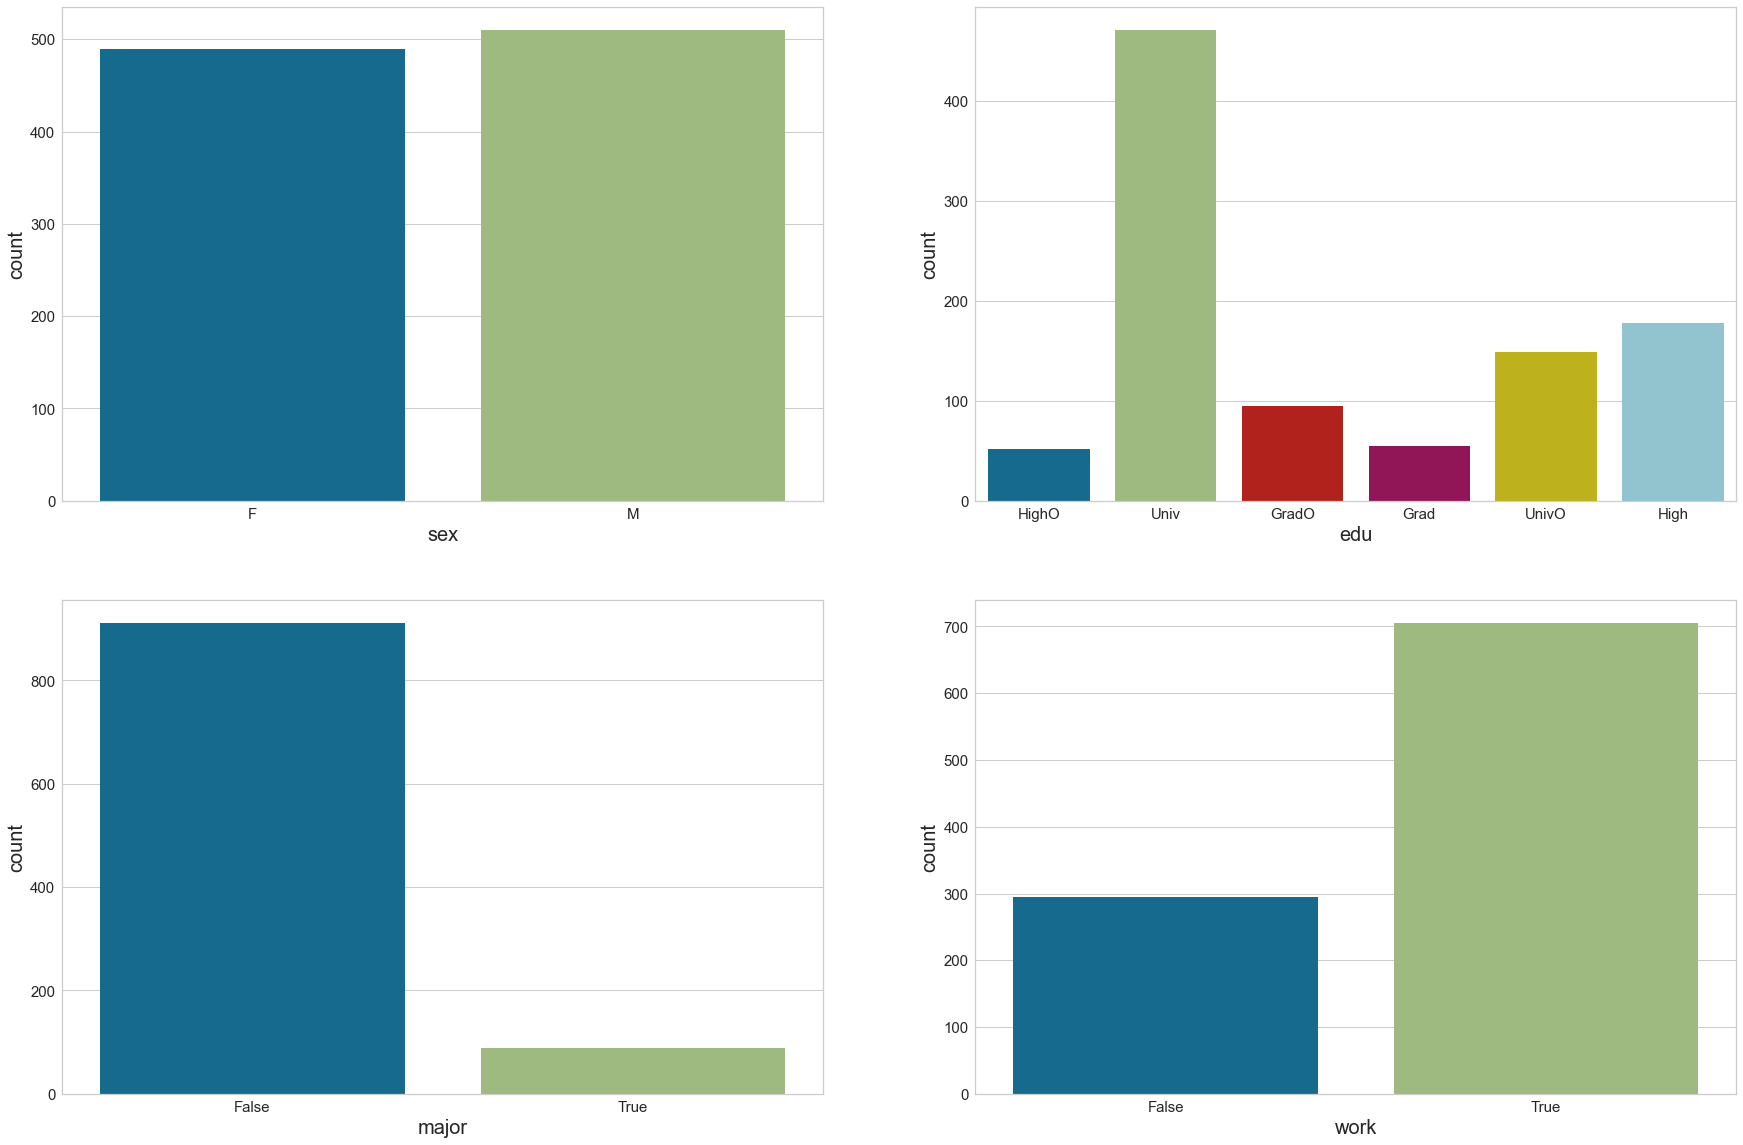

In [115]:
# Check number of values for every categorical variable
import seaborn as sns
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30,20))
sns.countplot(x="sex", data=n_nums, ax = ax1)
sns.countplot(x="edu", data=n_nums, ax = ax2)
sns.countplot(x="major", data=n_nums, ax = ax3)
sns.countplot(x="work", data=n_nums, ax = ax4)
ax1.xaxis.get_label().set_fontsize(20)
ax2.xaxis.get_label().set_fontsize(20)
ax3.xaxis.get_label().set_fontsize(20)
ax4.xaxis.get_label().set_fontsize(20)
ax1.yaxis.get_label().set_fontsize(20)
ax2.yaxis.get_label().set_fontsize(20)
ax3.yaxis.get_label().set_fontsize(20)
ax4.yaxis.get_label().set_fontsize(20)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax3.tick_params(labelsize=15)
ax4.tick_params(labelsize=15)
plt.show()

<AxesSubplot:xlabel='work', ylabel='count'>

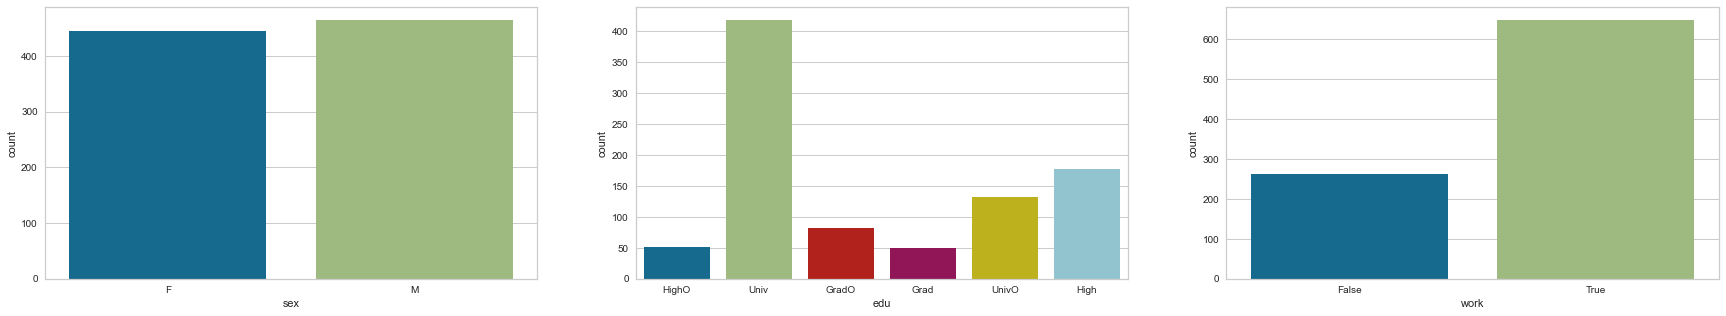

In [116]:
fig, axs = plt.subplots(ncols=3, figsize=(30,5))
sns.countplot(x="sex", data=n_nums[n_nums["major"] == False], ax = axs[0])
sns.countplot(x="edu", data=n_nums[n_nums["major"] == False], ax = axs[1])
sns.countplot(x="work", data=n_nums[n_nums["major"] == False], ax = axs[2])

<AxesSubplot:xlabel='major', ylabel='IAT'>

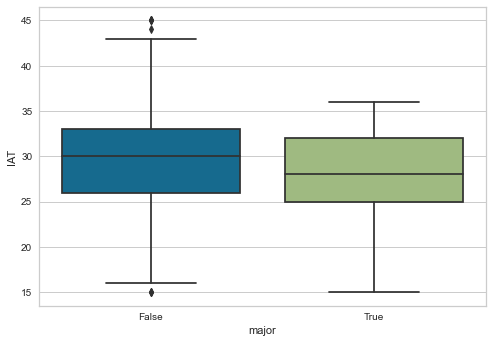

In [117]:
sns.boxplot(x='major', y='IAT', data=df[df["work"] == False])

<AxesSubplot:xlabel='work', ylabel='count'>

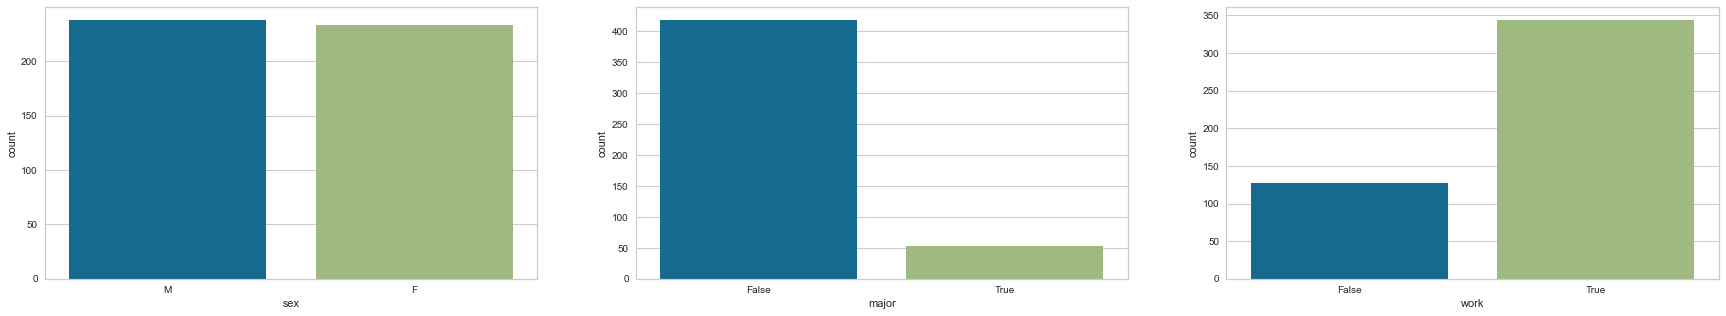

In [118]:
fig, axs = plt.subplots(ncols=3, figsize=(30,5))
sns.countplot(x="sex", data=n_nums[n_nums["edu"] == 'Univ'], ax = axs[0])
sns.countplot(x="major", data=n_nums[n_nums["edu"] == 'Univ'], ax = axs[1])
sns.countplot(x="work", data=n_nums[n_nums["edu"] == 'Univ'], ax = axs[2])

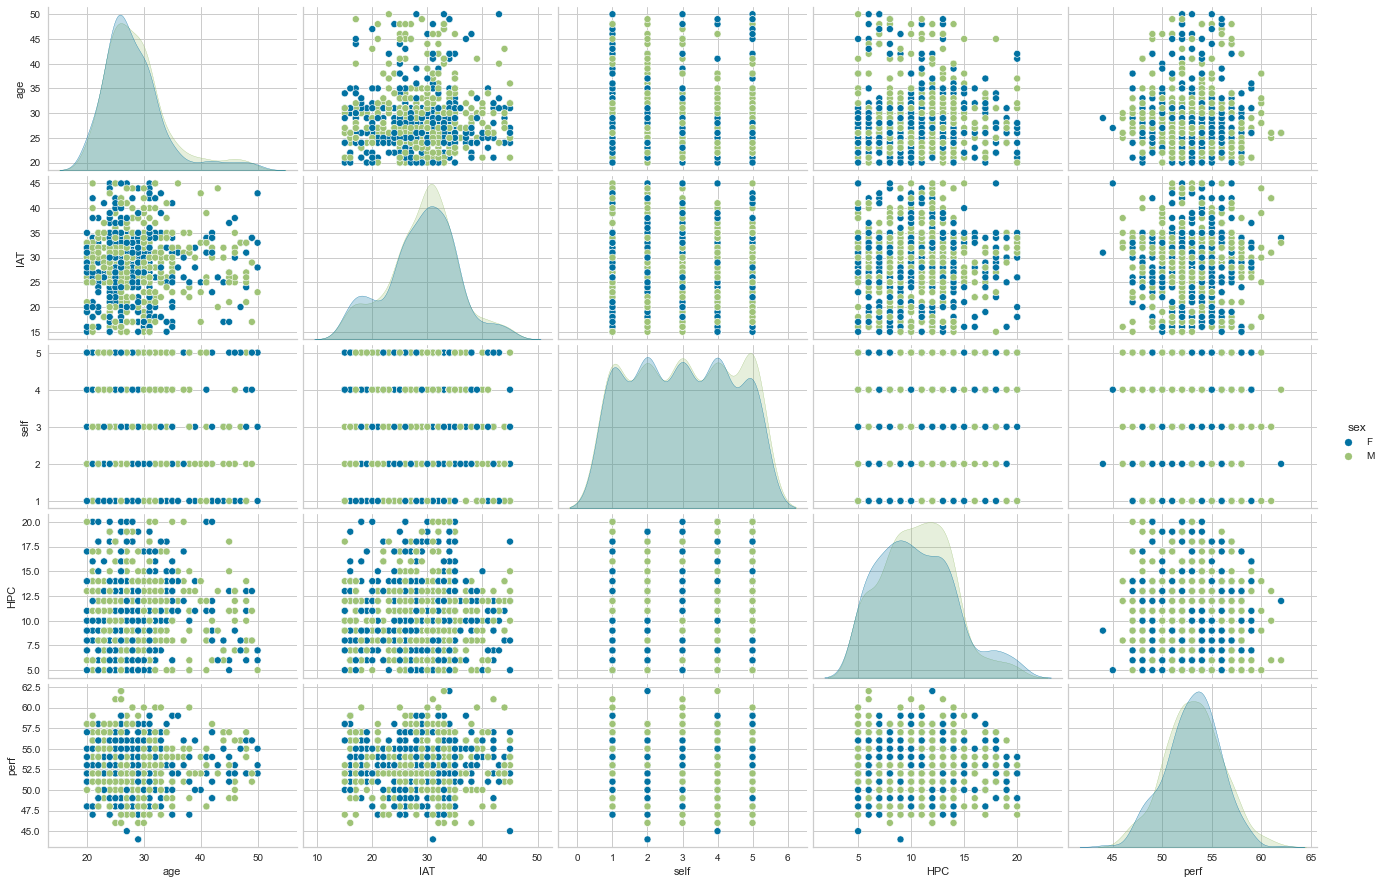

In [119]:
# Check gender vs. features
sns.pairplot(df.drop(['edu','major','work'], axis = 1), hue='sex', aspect=1.5)
plt.show()

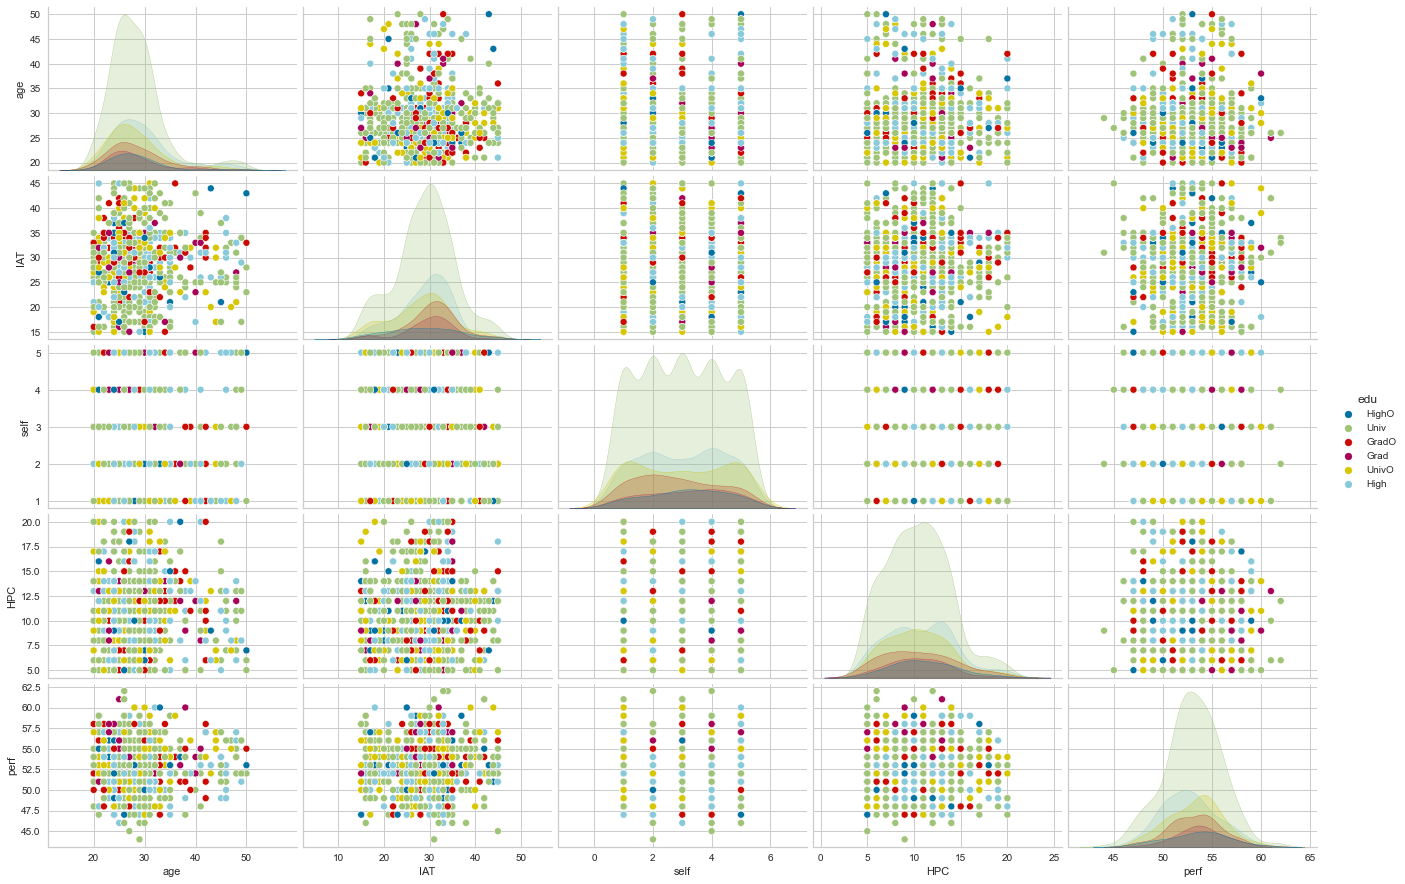

In [120]:
# Check education vs. features
sns.pairplot(df.drop(['sex','major','work'], axis = 1), hue='edu', aspect=1.5)
plt.show()

<AxesSubplot:xlabel='edu', ylabel='IAT'>

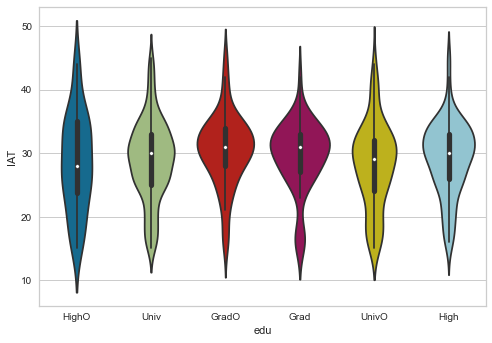

In [121]:
sns.violinplot(x='edu', y='IAT', data=df)

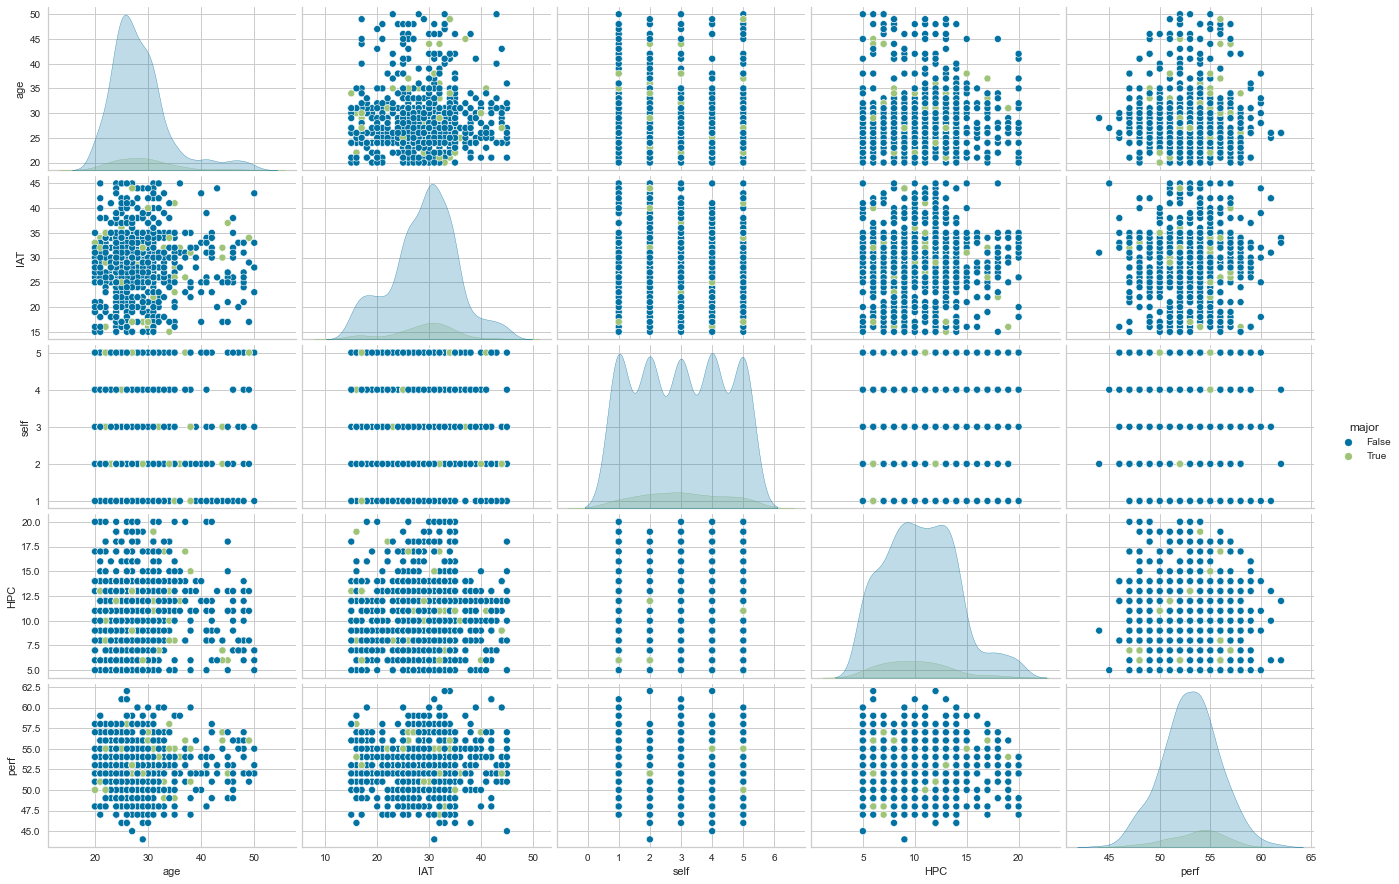

In [122]:
# Check major vs. features
sns.pairplot(df.drop(['sex','edu','work'], axis = 1), hue='major', aspect=1.5)
plt.show()

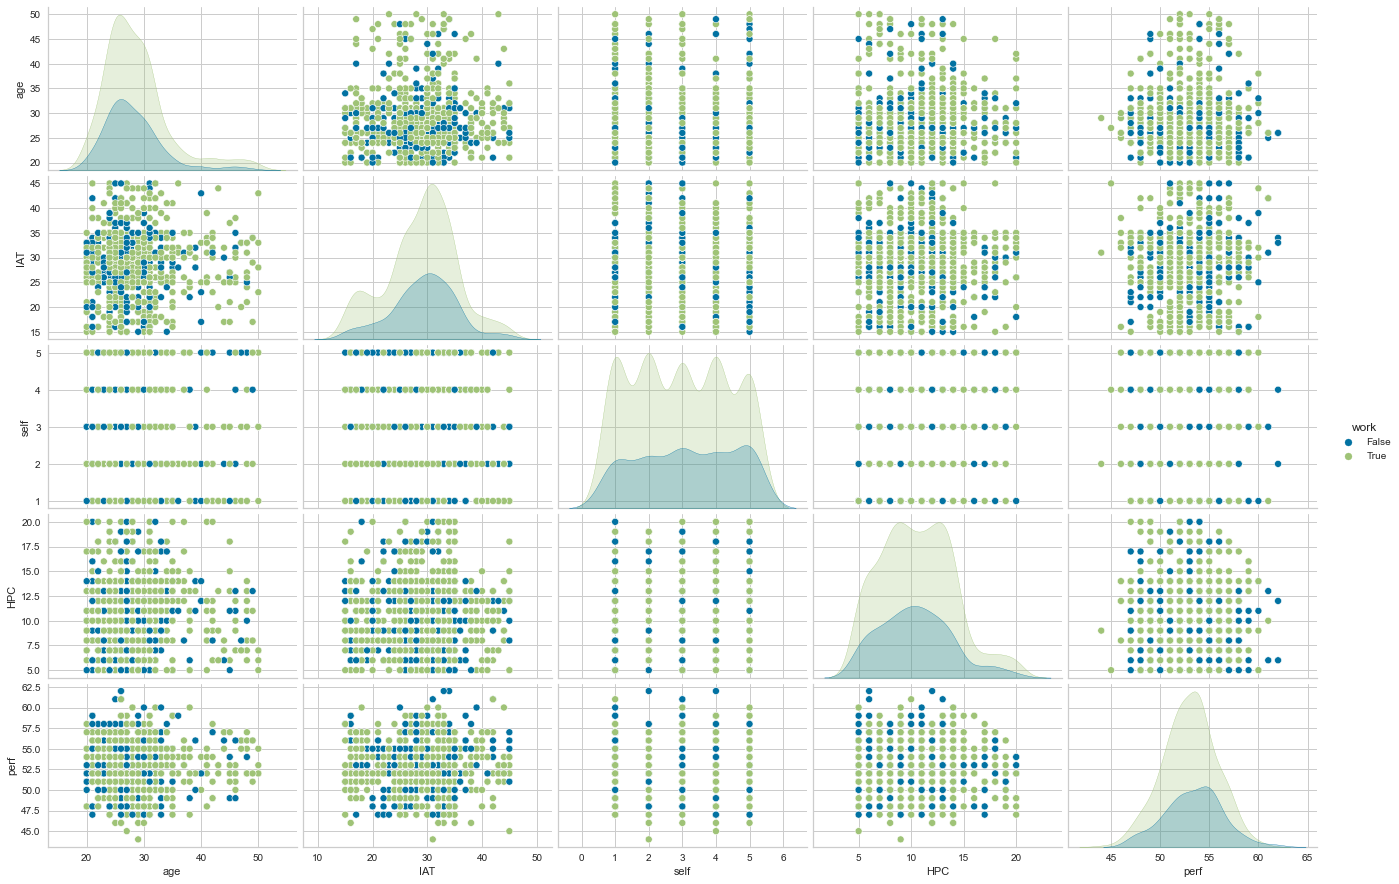

In [123]:
# Check work vs. features
sns.pairplot(df.drop(['sex','edu','major'], axis = 1), hue='work', aspect=1.5)
plt.show()

Pre-processing

In [124]:
# duplicate variable
n_nums_enc = n_nums.copy()

In [125]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# gender, major and work features are binary
n_nums_enc.loc[:,"sex_e"] = ord_enc.fit_transform(n_nums_enc[["sex"]])
n_nums_enc.loc[:,"major_e"] = ord_enc.fit_transform(n_nums_enc[["major"]])
n_nums_enc.loc[:,"work_e"] = ord_enc.fit_transform(n_nums_enc[["work"]])

In [126]:
# One hot encoding for education
n_nums_enc.loc[:,"edu1"] = n_nums_enc.loc[:,"edu"]
n_nums_enc = pd.get_dummies(n_nums_enc , columns = ['edu1'])
print(n_nums_enc)

edu_cols = [col for col in n_nums_enc if col.startswith('edu1')]

    sex    edu  major   work  sex_e  major_e  work_e  edu1_Grad  edu1_GradO  \
0     F  HighO  False   True    0.0      0.0     1.0          0           0   
1     M   Univ  False   True    1.0      0.0     1.0          0           0   
2     M   Univ  False   True    1.0      0.0     1.0          0           0   
3     F   Univ  False   True    0.0      0.0     1.0          0           0   
4     F   Univ  False   True    0.0      0.0     1.0          0           0   
..   ..    ...    ...    ...    ...      ...     ...        ...         ...   
995   F   Univ  False  False    0.0      0.0     0.0          0           0   
996   M   Univ  False   True    1.0      0.0     1.0          0           0   
997   M   High  False   True    1.0      0.0     1.0          0           0   
998   M   Univ  False   True    1.0      0.0     1.0          0           0   
999   F   High  False   True    0.0      0.0     1.0          0           0   

     edu1_High  edu1_HighO  edu1_Univ  edu1_UnivO  

In [127]:
# merge numerical values and encoded values
nums_ext = pd.merge(nums, n_nums_enc, left_index = True, right_index= True)
print(nums_ext.head())

   age  IAT  self  HPC  perf sex    edu  major  work  sex_e  major_e  work_e  \
0   27   27     3   11    53   F  HighO  False  True    0.0      0.0     1.0   
1   30   31     1    8    47   M   Univ  False  True    1.0      0.0     1.0   
2   31   19     5    8    54   M   Univ  False  True    1.0      0.0     1.0   
3   30   27     4   17    53   F   Univ  False  True    0.0      0.0     1.0   
4   40   25     2   12    50   F   Univ  False  True    0.0      0.0     1.0   

   edu1_Grad  edu1_GradO  edu1_High  edu1_HighO  edu1_Univ  edu1_UnivO  
0          0           0          0           1          0           0  
1          0           0          0           0          1           0  
2          0           0          0           0          1           0  
3          0           0          0           0          1           0  
4          0           0          0           0          1           0  


K-means clustering

In [128]:
X = nums_ext.drop(n_nums_cols, axis = 1)

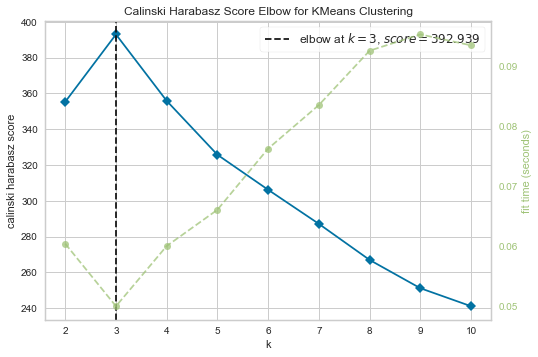

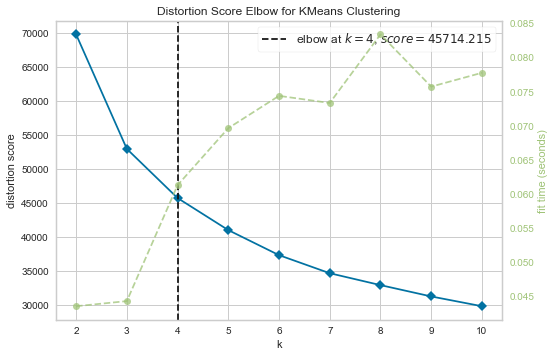

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
cl = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz')

cl.fit(X)
cl.poof()

cl2 = KElbowVisualizer(model, k=(2,11))

cl2.fit(X)
cl2.poof()

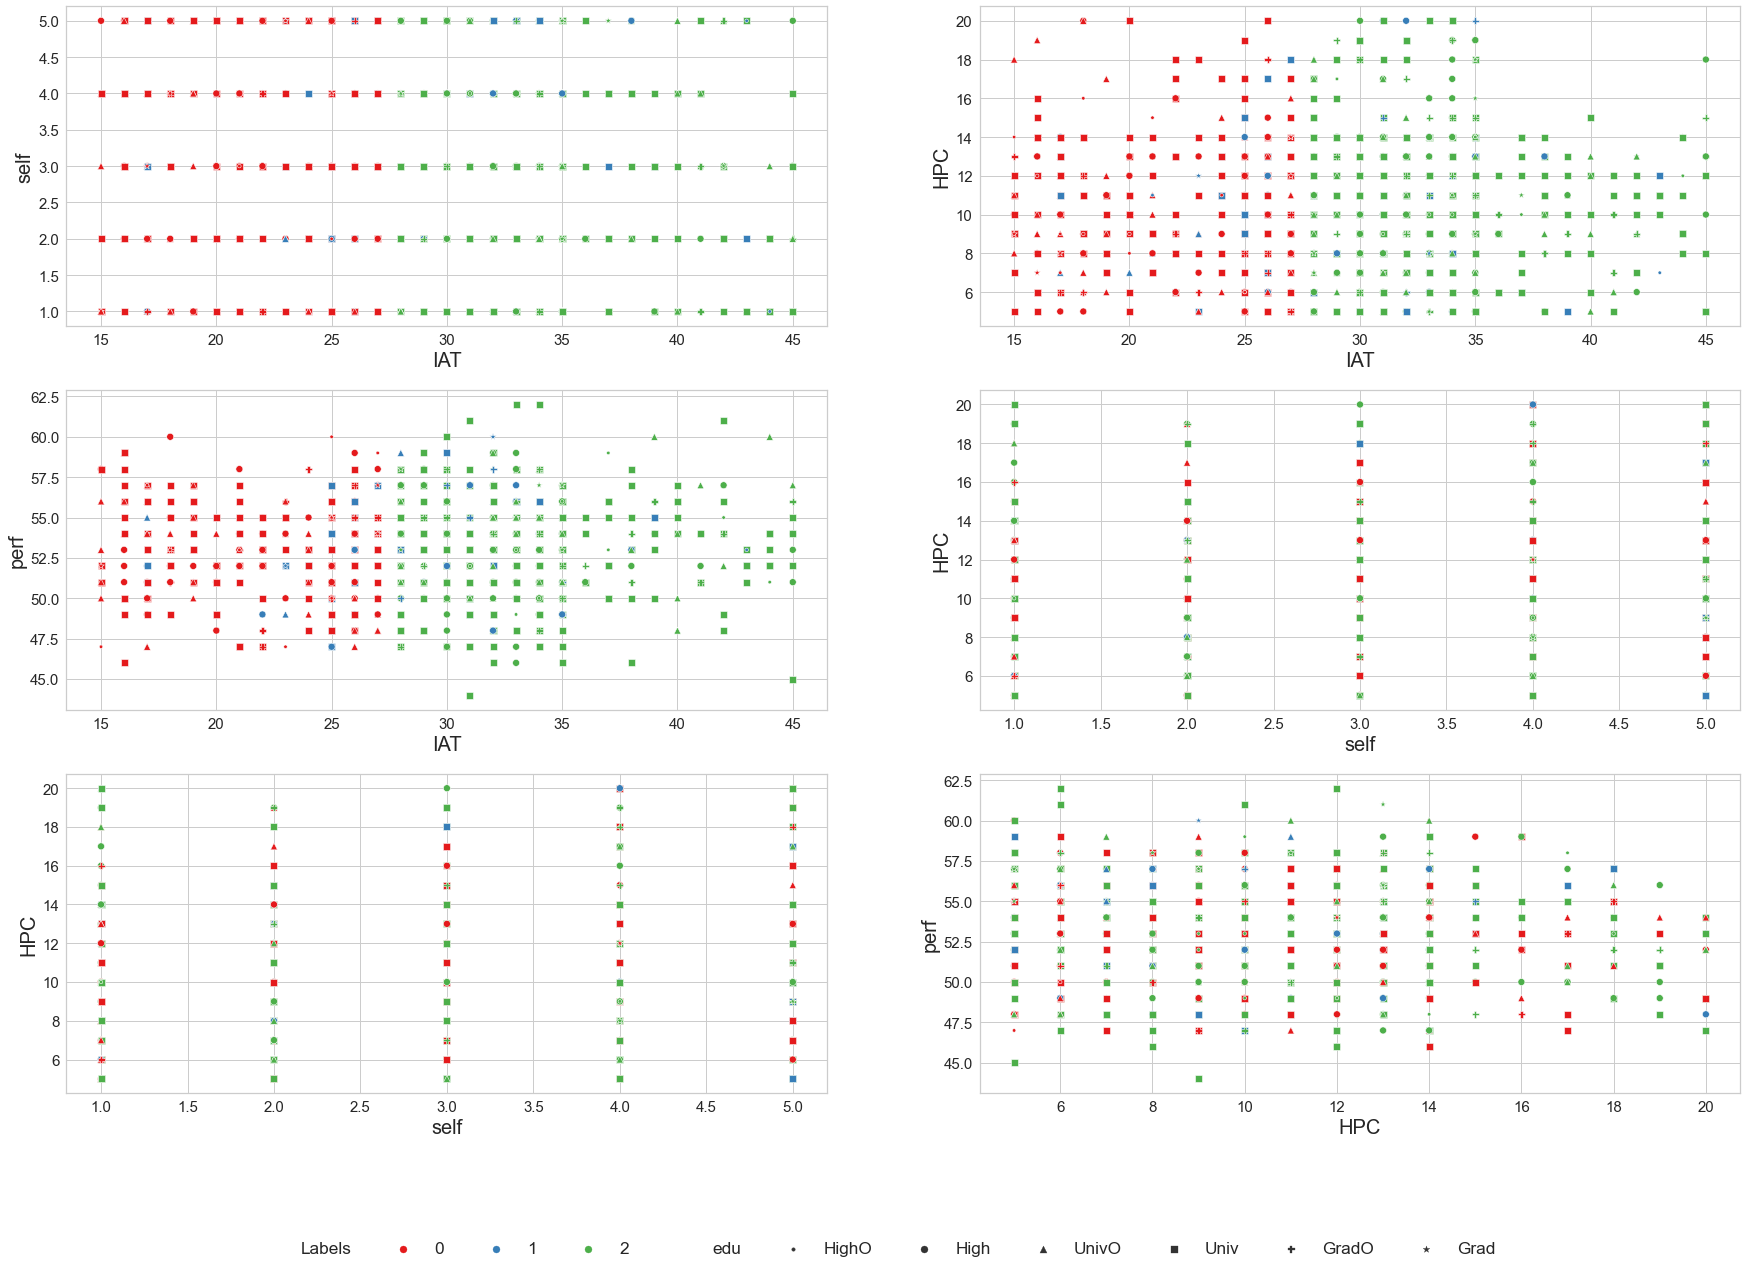

In [130]:
n_cls = 3
km3 = KMeans(n_clusters=n_cls).fit(X)

nums_ext['Labels'] = km3.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          24    52     57   158     23    14
1           4    28     13    40     11     6
2          24    98     79   273     61    35


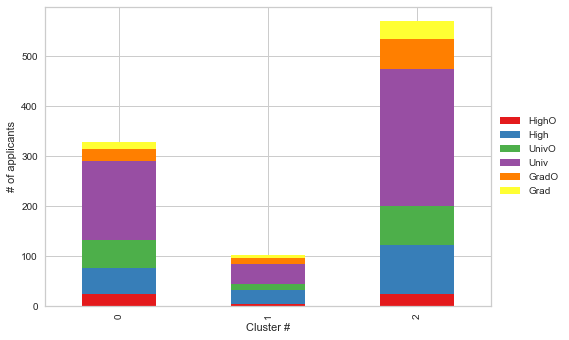

In [131]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

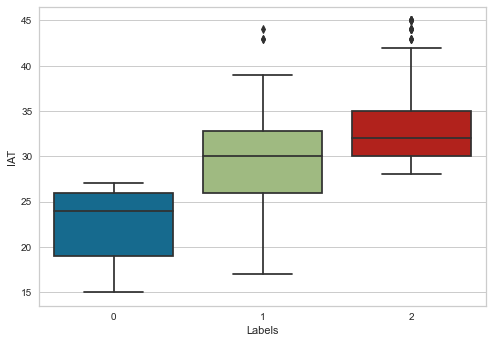

In [132]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

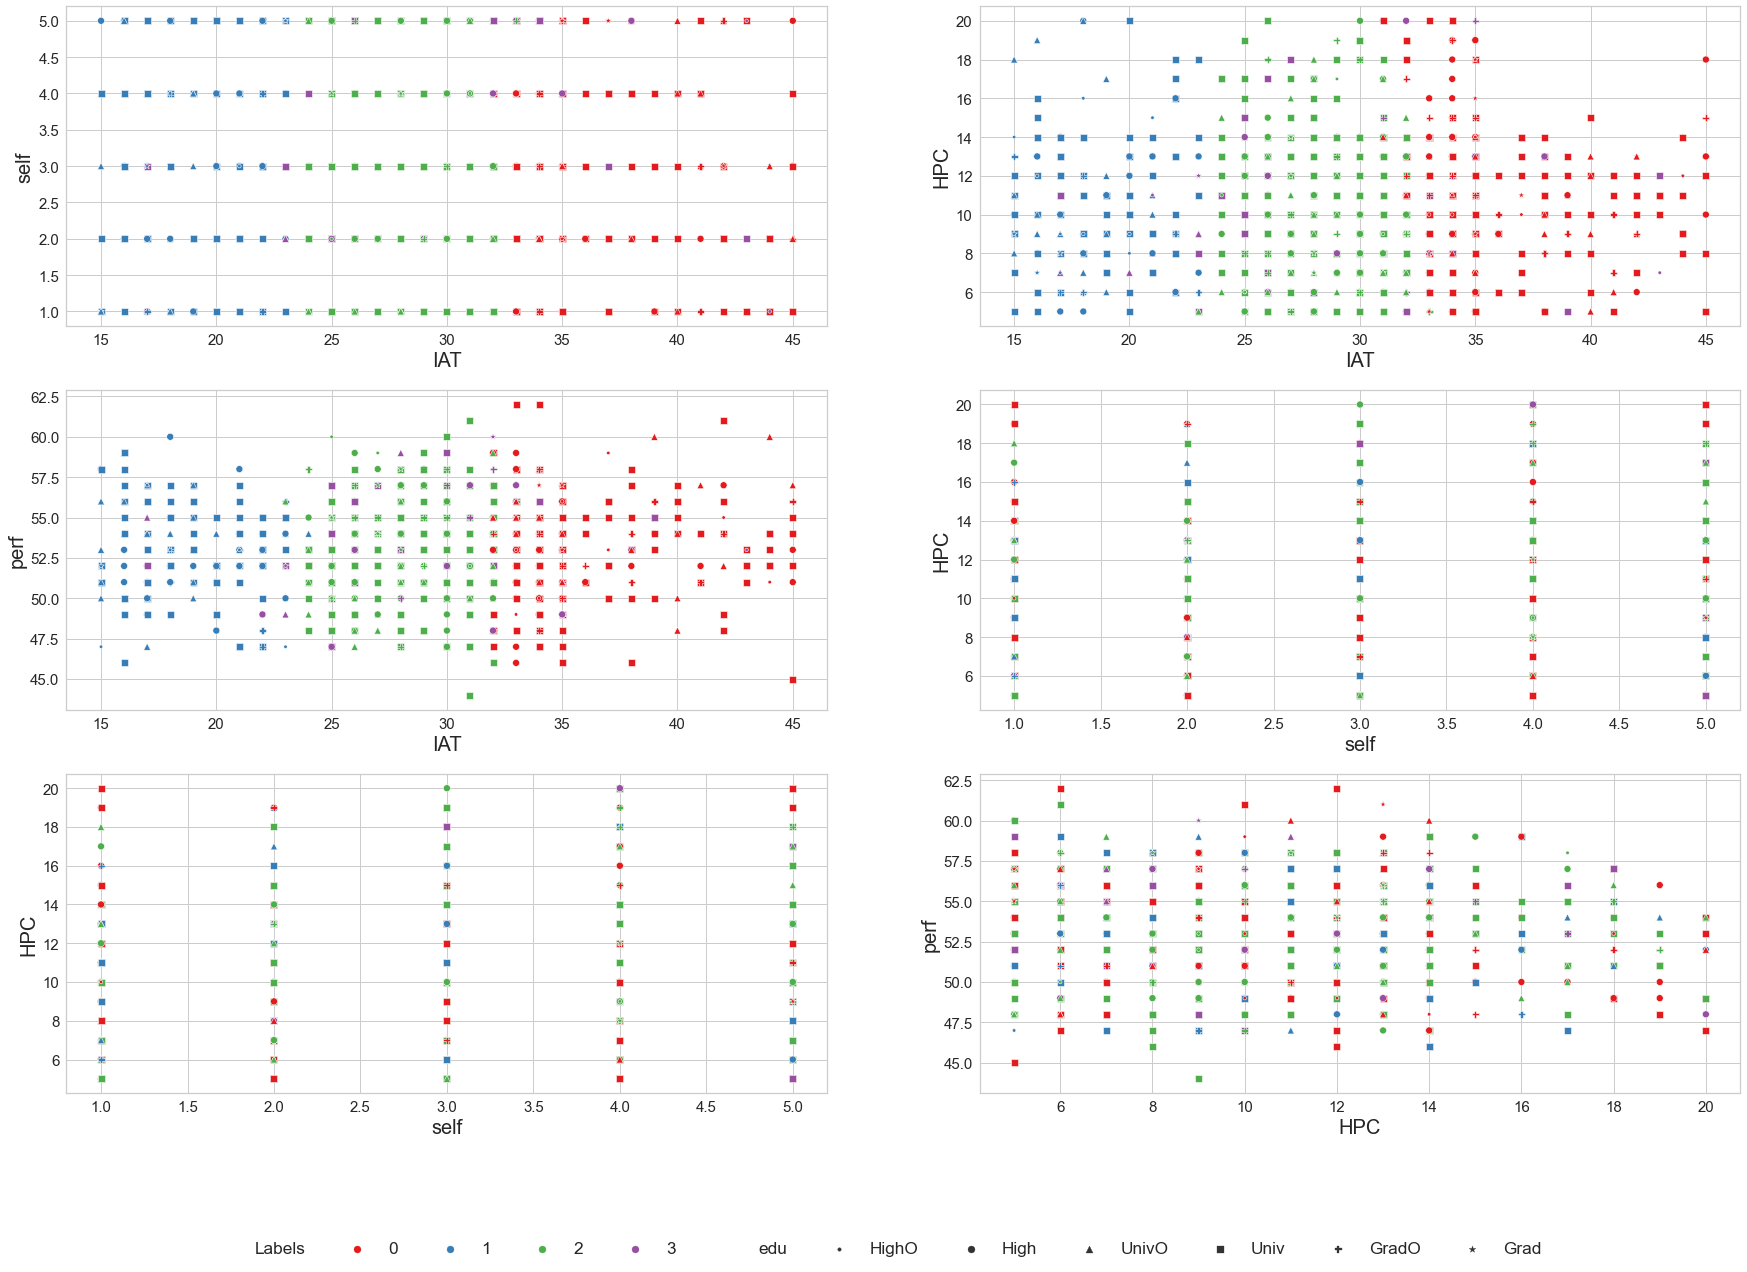

In [133]:
n_cls = 4
km4 = KMeans(n_clusters=n_cls).fit(X)

nums_ext['Labels'] = km4.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          15    52     37   134     33    14
1          12    27     27    76     10     5
2          21    71     70   219     40    30
3           4    28     15    42     12     6


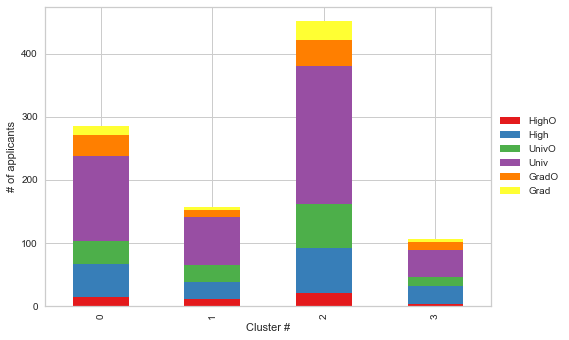

In [134]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

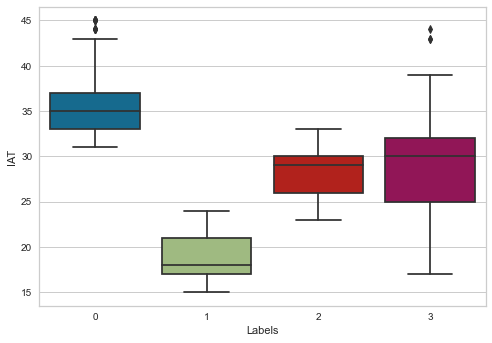

In [135]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

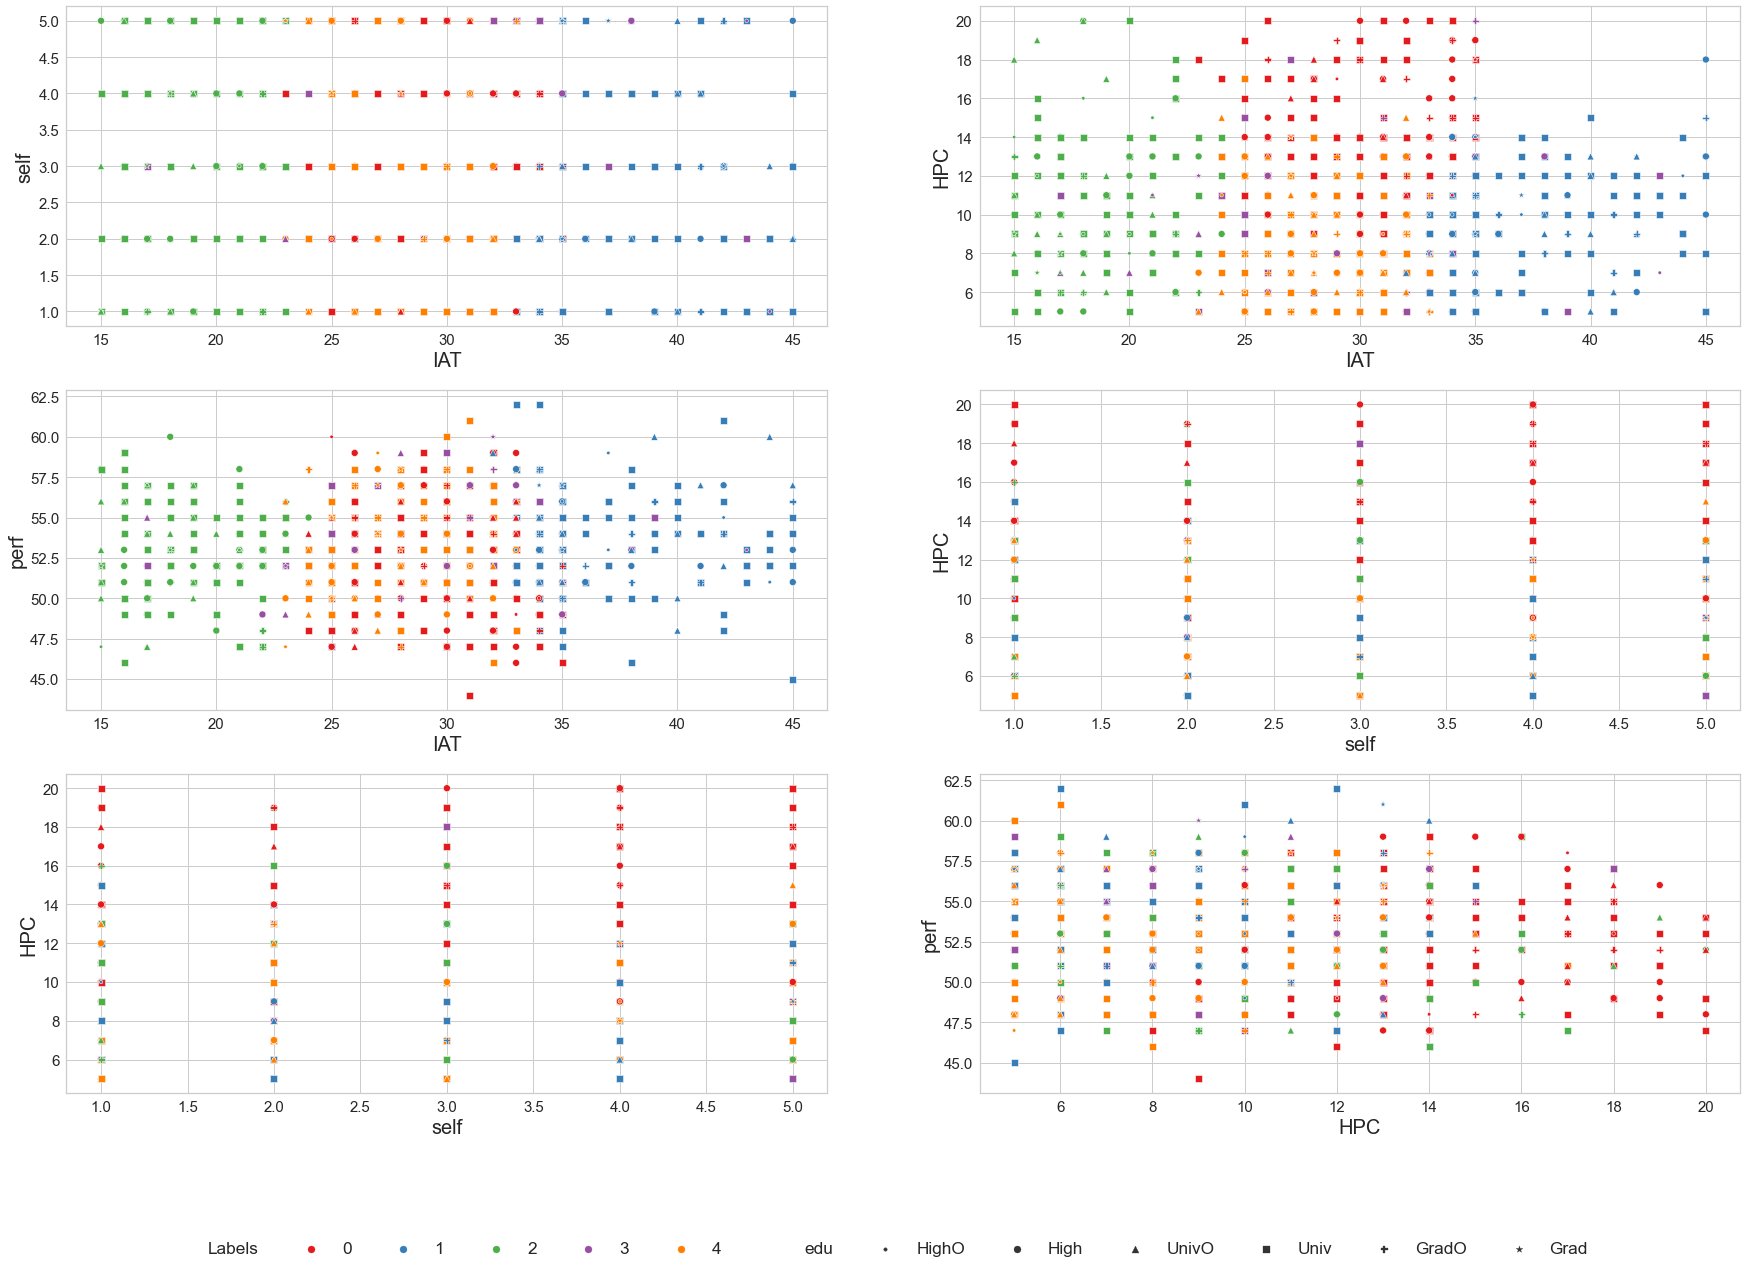

In [136]:
n_cls = 5
km5 = KMeans(n_clusters=n_cls).fit(X)

nums_ext['Labels'] = km5.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          13    55     29   109     25     6
1          11    27     24   102     18    11
2          11    28     26    78     10     5
3           3    21     12    30      8     6
4          14    47     58   152     34    27


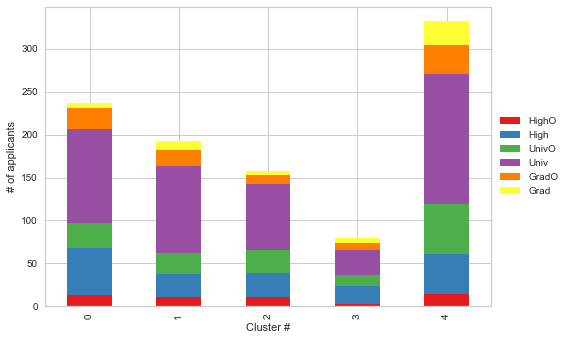

In [137]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

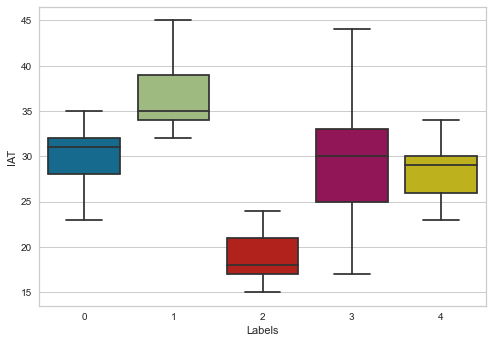

In [138]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

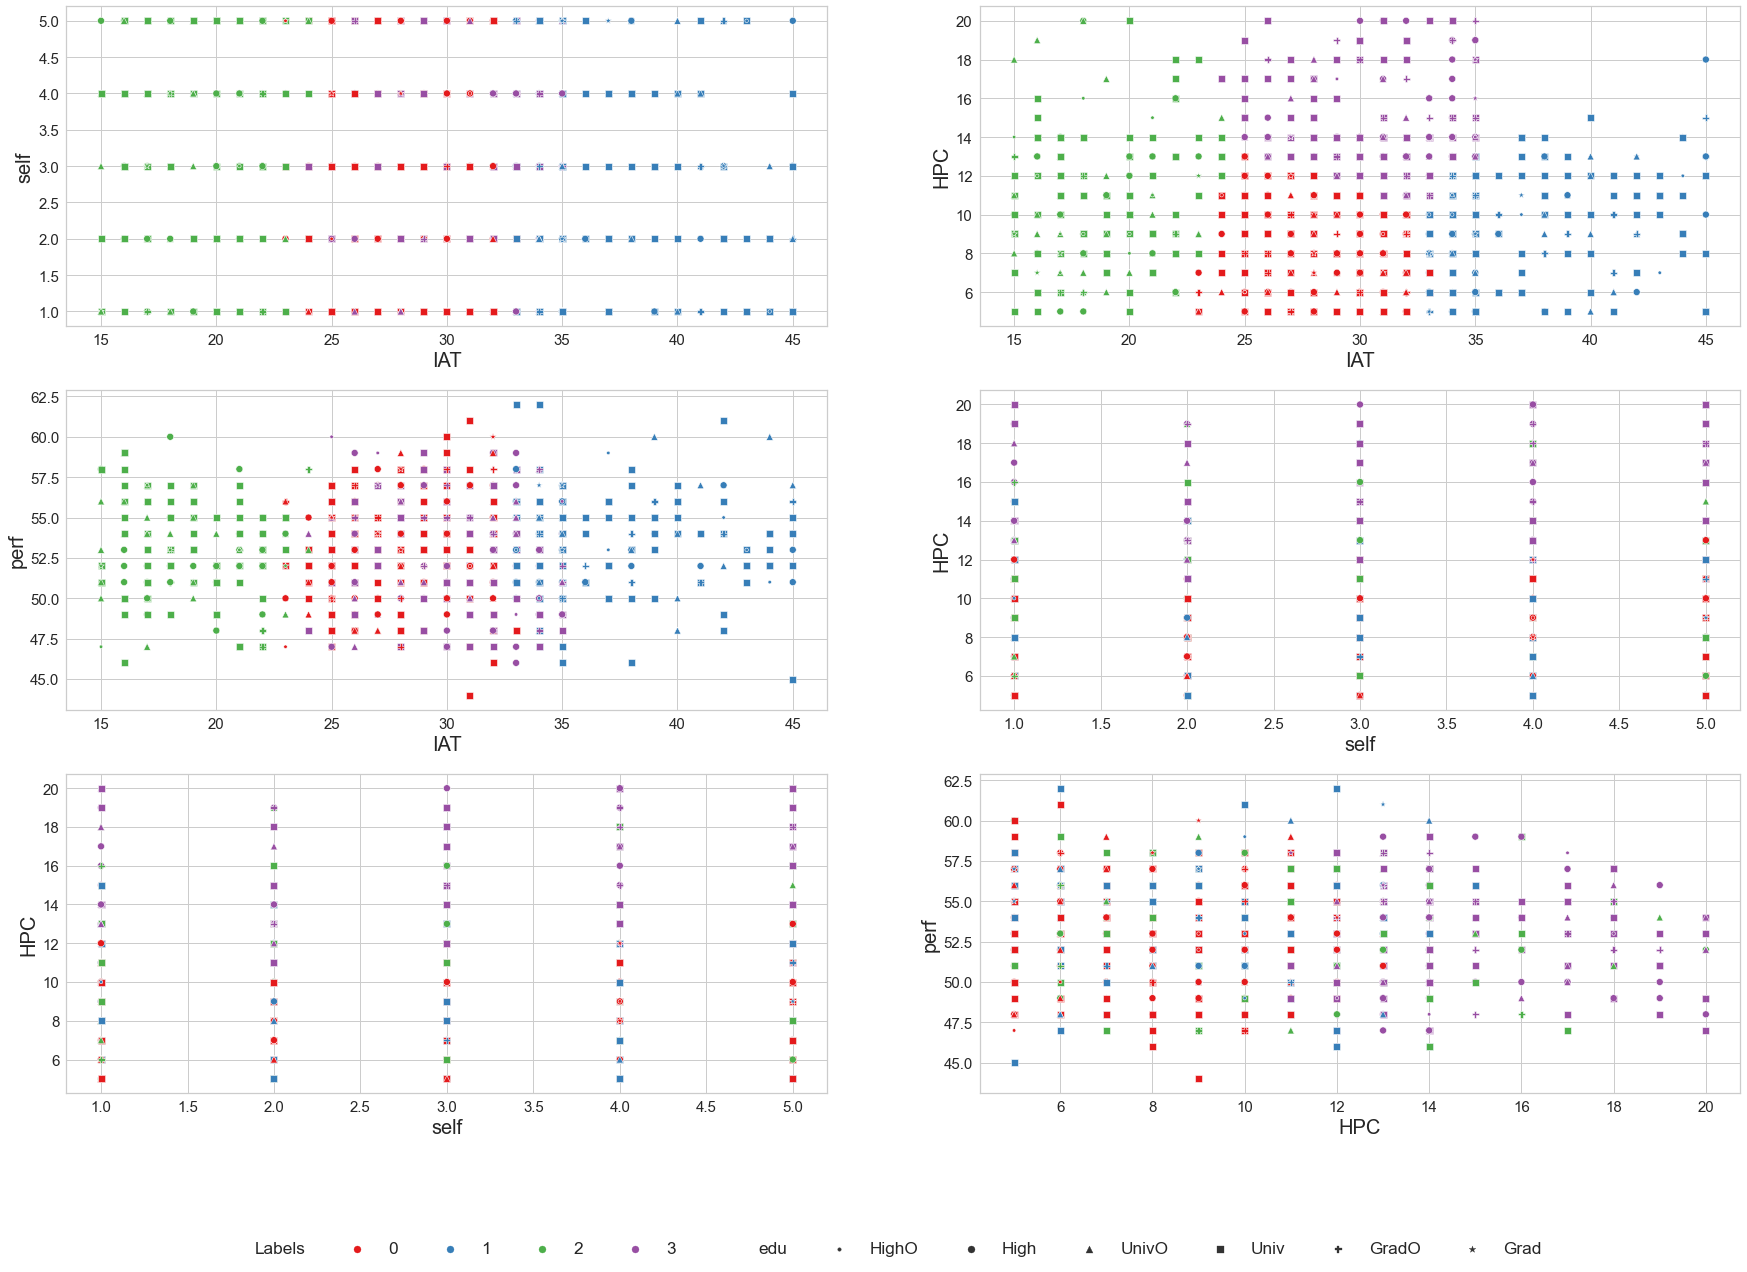

In [139]:
# clustering based on some variables

n_cls = 4
km4 = KMeans(n_clusters=n_cls).fit(X[['IAT', 'self', 'HPC', 'perf'] + edu_cols])

nums_ext['Labels'] = km4.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          14    65     59   167     34    23
1          13    32     23   108     21    12
2          12    28     33    83     10     6
3          13    53     34   113     30    14


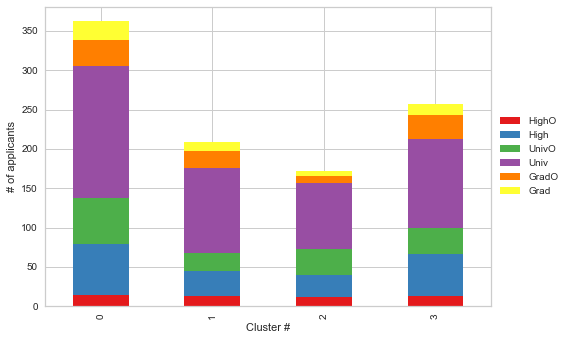

In [140]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

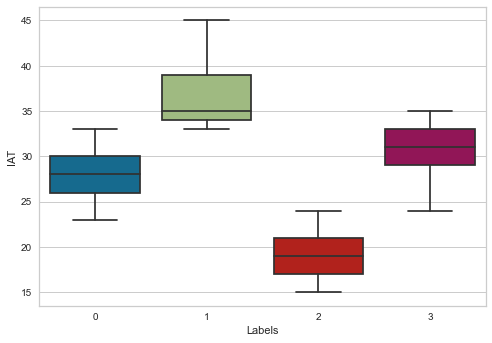

In [141]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

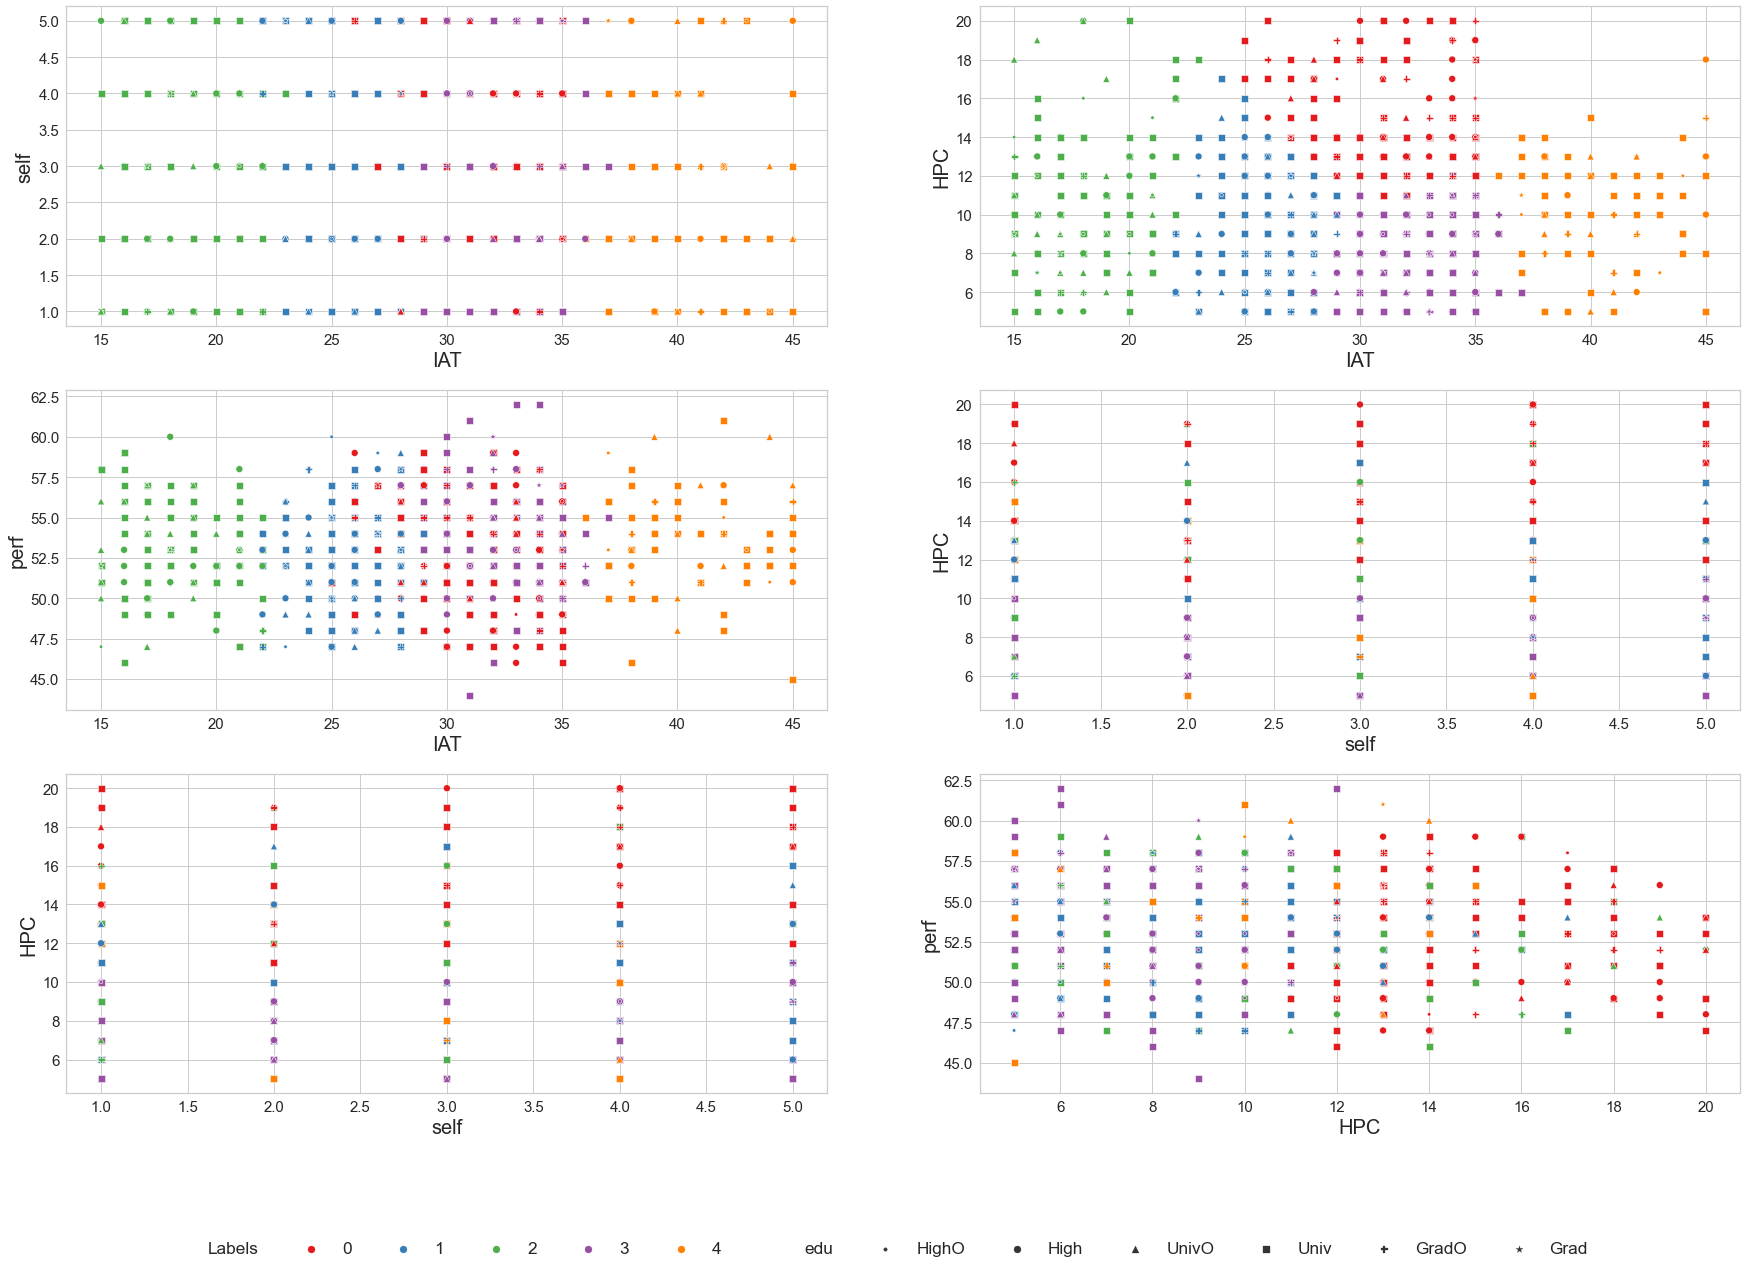

In [151]:
# clustering based on variables except gender

n_cls = 5
km5 = KMeans(n_clusters=n_cls).fit(X[['IAT', 'self', 'HPC', 'perf', 'major_e', 'work_e'] + edu_cols])

nums_ext['Labels'] = km5.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          10    52     28   105     31    13
1          14    40     39   120     18    12
2          12    24     29    72      7     5
3          10    53     40   129     31    23
4           6     9     13    45      8     2


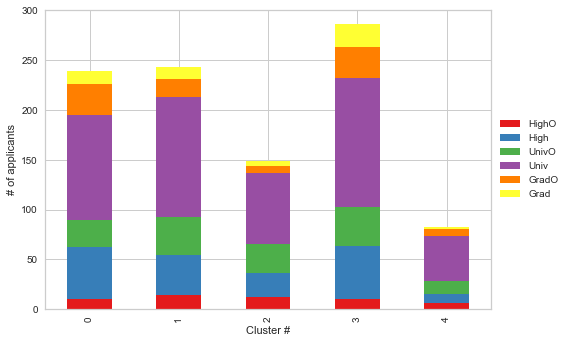

In [152]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

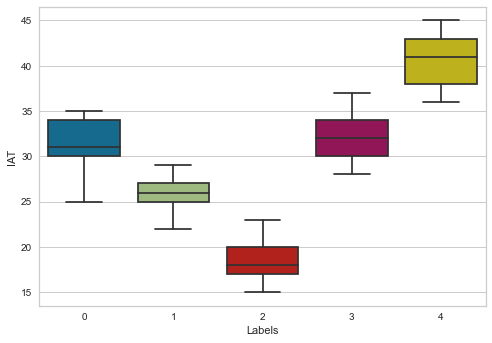

In [153]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

In [169]:
# separate other clusters
nums_k5 = nums_ext.copy()
nums_k5["Labels"] = nums_k5["Labels"].replace({0: "0, 1, 2, 3", 1: "0, 1, 2, 3", 2: "0, 1, 2, 3", 3: "0, 1, 2, 3"})
print(nums_k5.describe())

               age          IAT         self          HPC         perf  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     28.484000    29.050000     3.000000    10.532000    53.094000   
std       5.632537     6.303748     1.414921     3.484411     2.819062   
min      20.000000    15.000000     1.000000     5.000000    44.000000   
25%      25.000000    25.000000     2.000000     8.000000    51.000000   
50%      27.000000    30.000000     3.000000    10.000000    53.000000   
75%      31.000000    33.000000     4.000000    13.000000    55.000000   
max      50.000000    45.000000     5.000000    20.000000    62.000000   

            sex_e      major_e       work_e    edu1_Grad   edu1_GradO  \
count  1000.00000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.51000     0.089000     0.705000     0.055000     0.095000   
std       0.50015     0.284886     0.456271     0.228094     0.293362   
min       0.00000     0.000000     0.0000

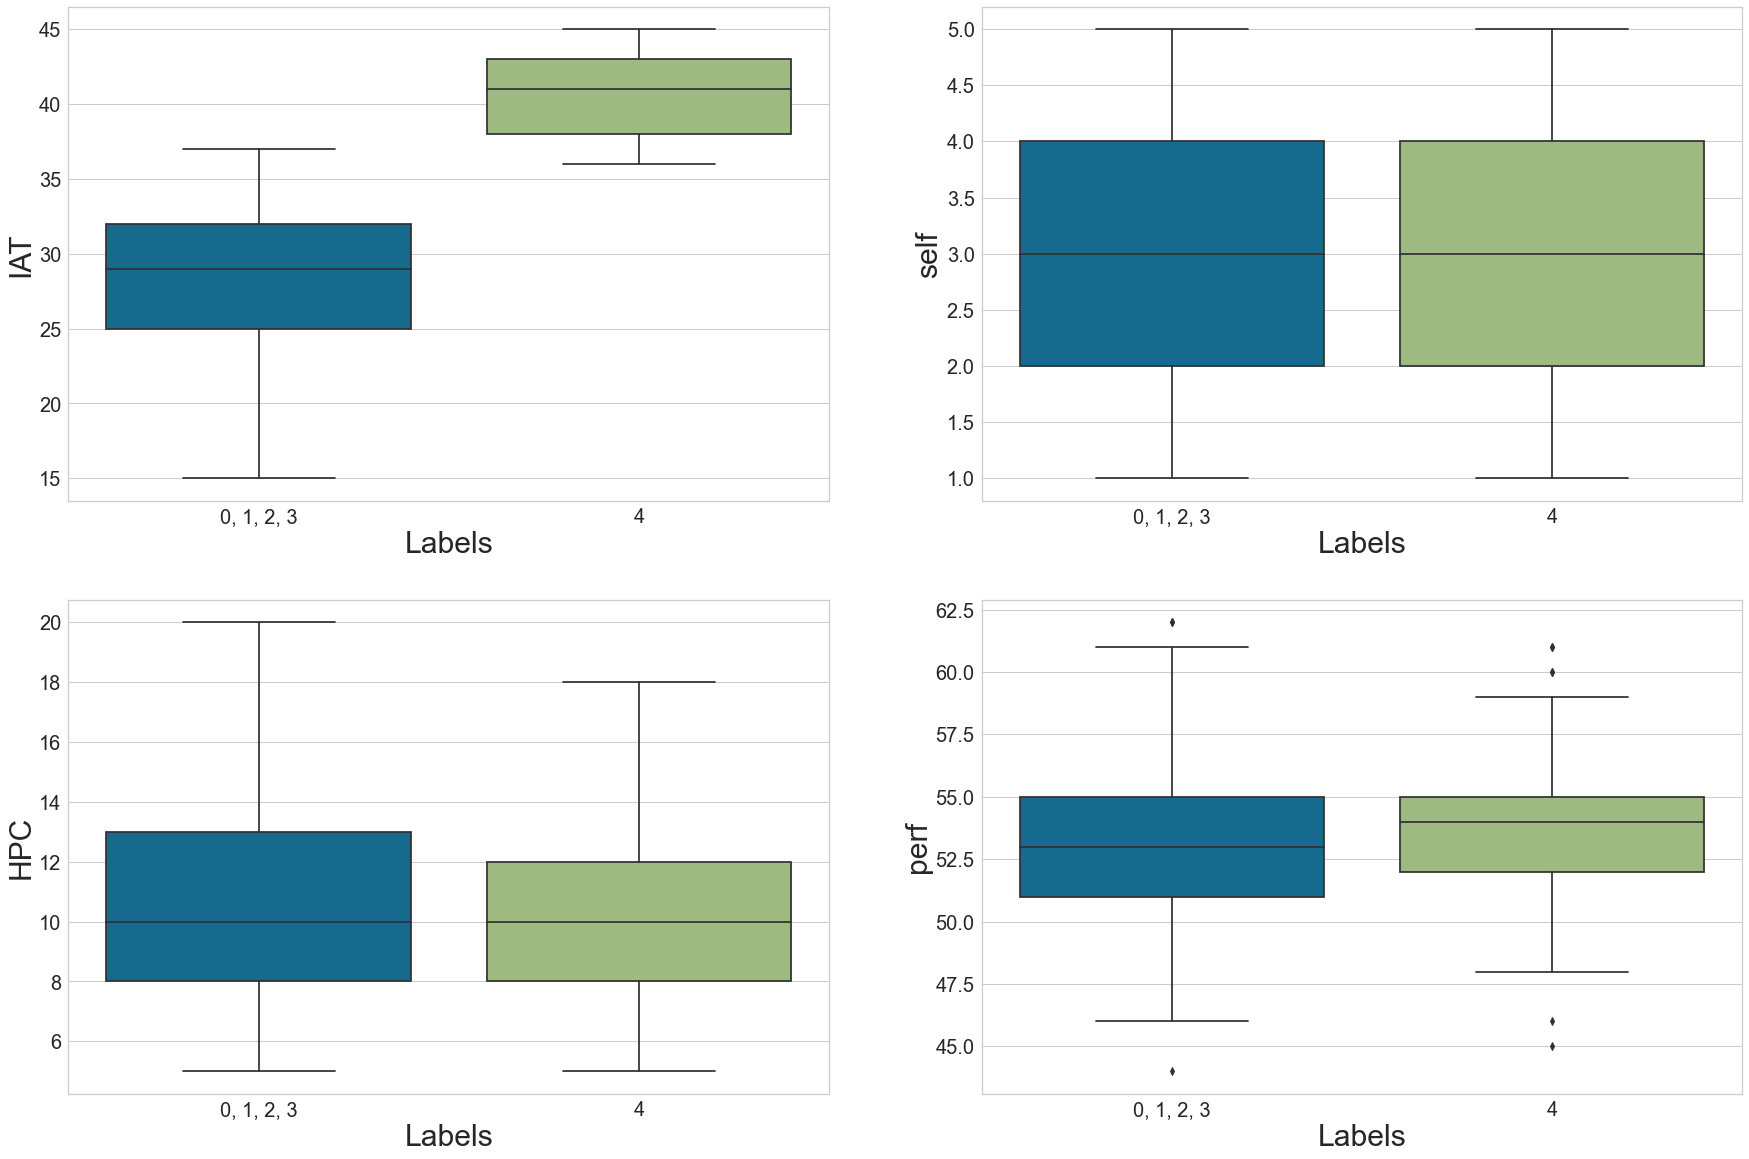

In [170]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30,20))
sns.boxplot(x='Labels', y='IAT', data=nums_k5, ax = ax1)
sns.boxplot(x='Labels', y='self', data=nums_k5, ax = ax2)
sns.boxplot(x='Labels', y='HPC', data=nums_k5, ax = ax3)
sns.boxplot(x='Labels', y='perf', data=nums_k5, ax = ax4)
ax1.xaxis.get_label().set_fontsize(30)
ax2.xaxis.get_label().set_fontsize(30)
ax3.xaxis.get_label().set_fontsize(30)
ax4.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax2.yaxis.get_label().set_fontsize(30)
ax3.yaxis.get_label().set_fontsize(30)
ax4.yaxis.get_label().set_fontsize(30)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)
ax4.tick_params(labelsize=20)
plt.show()

Gaussian mixture model

In [145]:
# check if features are gaussian
from scipy.stats import shapiro
for i in X.columns:
    print(f'{i}: {"Not Gaussian" if shapiro(X[i])[1]<0.05 else "Gaussian"}  {shapiro(X[i])}')

age: Not Gaussian  ShapiroResult(statistic=0.8808866739273071, pvalue=5.314387977382806e-27)
IAT: Not Gaussian  ShapiroResult(statistic=0.9763420224189758, pvalue=1.091985182832822e-11)
self: Not Gaussian  ShapiroResult(statistic=0.8878237009048462, pvalue=2.611468559951761e-26)
HPC: Not Gaussian  ShapiroResult(statistic=0.9645125269889832, pvalue=6.948751673347374e-15)
perf: Not Gaussian  ShapiroResult(statistic=0.9881690144538879, pvalue=3.2280195227940567e-07)
sex_e: Not Gaussian  ShapiroResult(statistic=0.6364485621452332, pvalue=1.3577180820843153e-41)
major_e: Not Gaussian  ShapiroResult(statistic=0.31976455450057983, pvalue=0.0)
work_e: Not Gaussian  ShapiroResult(statistic=0.5723682641983032, pvalue=5.465064010866787e-44)
edu1_Grad: Not Gaussian  ShapiroResult(statistic=0.23798465728759766, pvalue=0.0)
edu1_GradO: Not Gaussian  ShapiroResult(statistic=0.33215218782424927, pvalue=0.0)
edu1_High: Not Gaussian  ShapiroResult(statistic=0.46391183137893677, pvalue=0.0)
edu1_HighO: N

Agglomerative Hierarchy

/var/folders/v7/ysbwg68966qbzhd4g05hfkq80000gn/T/ipykernel_17885/285989230.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'ward')


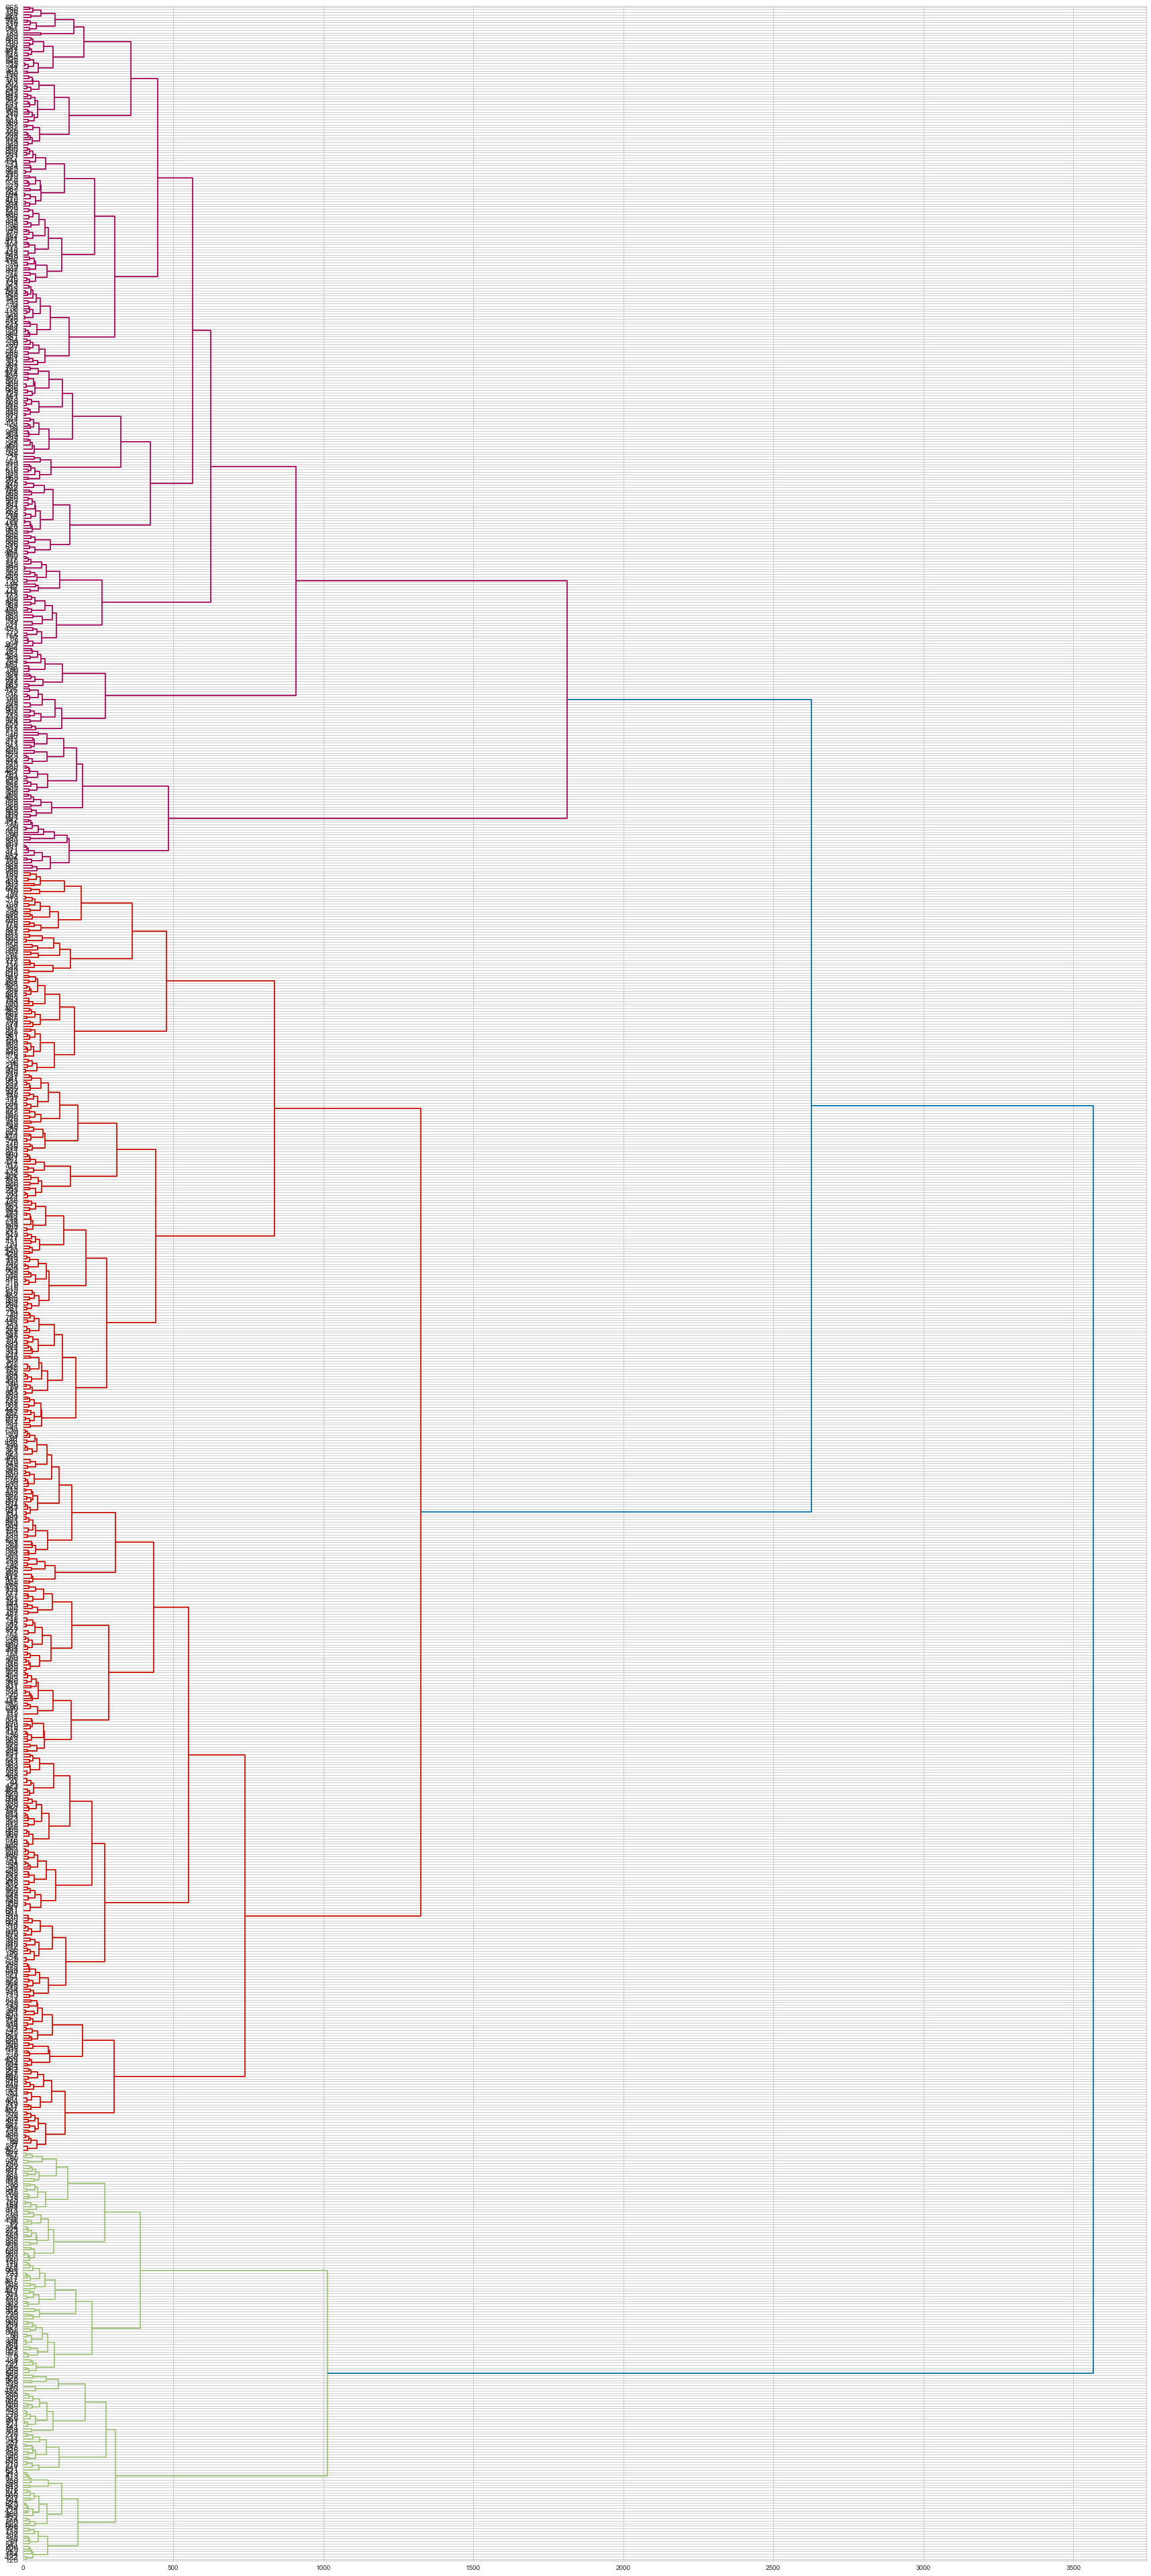

In [146]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X[['IAT', 'self', 'HPC', 'perf']], X[['IAT', 'self', 'HPC', 'perf']])
Z = hierarchy.linkage(dist, 'ward')

plt.figure(figsize=(30, 70))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

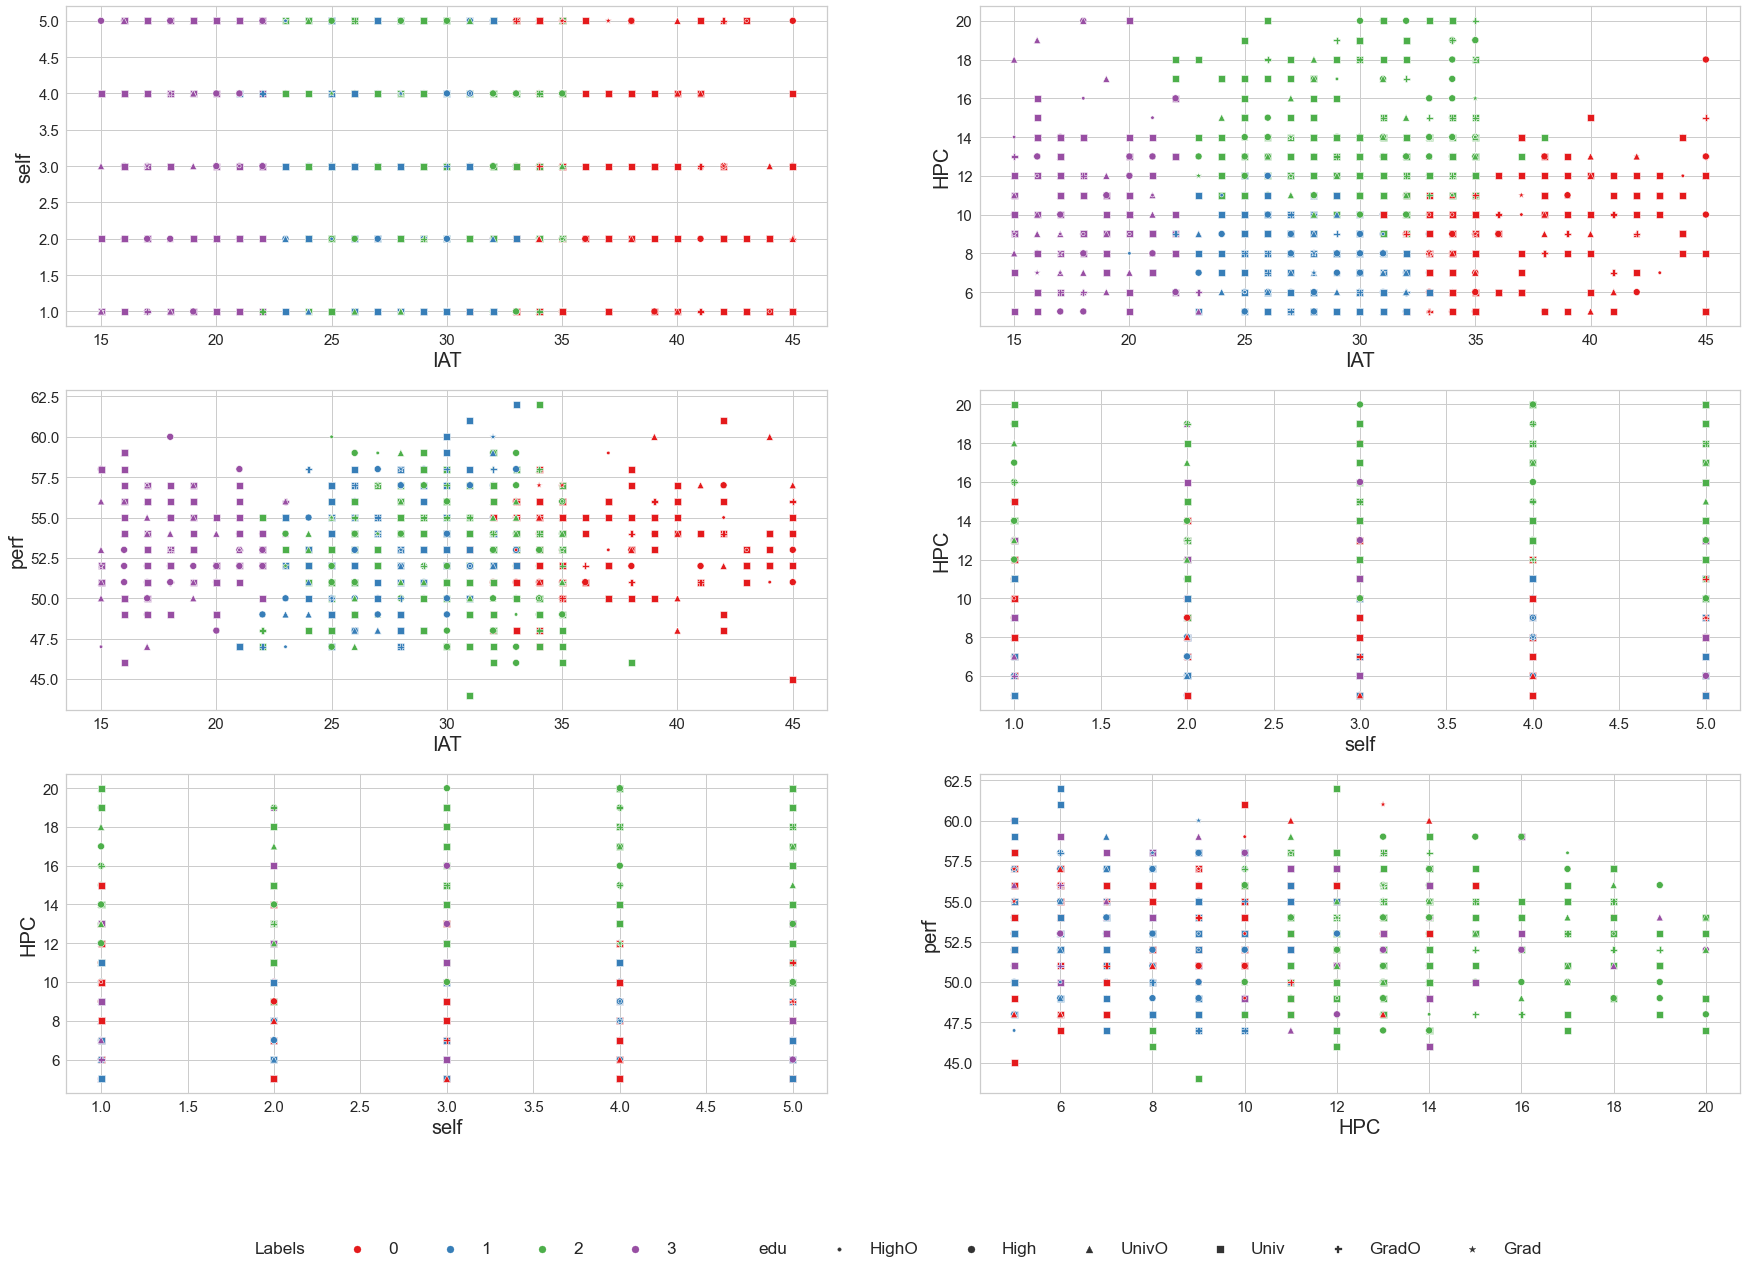

In [147]:
from sklearn.cluster import AgglomerativeClustering
n_cls = 4
# It can be seen that around line 2000, it is divided to 4 Clusters
agg_model = AgglomerativeClustering(n_clusters = n_cls, linkage = 'ward')

# assign each data point to a cluster
nums_ext['Labels'] = agg_model.fit_predict(X[['IAT', 'self', 'HPC', 'perf']])
n_cls = len(set(nums_ext['Labels']))

plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          11    28     24   100     21    11
1          13    56     46   140     30    16
2          18    69     48   160     36    23
3          10    25     31    71      8     5
   Labels        age        IAT      self        HPC       perf     major  \
0       0  28.866667  36.769231  2.933333   8.943590  53.461538  0.071795   
1       1  28.352159  27.860465  2.980066   7.903654  53.073090  0.102990   
2       2  28.440678  30.347458  2.983051  13.632768  52.867232  0.093220   
3       3  28.353333  18.340000  3.166667  10.553333  53.193333  0.073333   

       work     sex_e   major_e    work_e  edu1_Grad  edu1_GradO  edu1_High  \
0  0.666667  0.476923  0.071795  0.666667   0.056410    0.107692   0.143590   
1  0.684385  0.514950  0.102990  0.684385   0.053156    0.099668   0.186047   
2  0.709040  0.536723  0.093220  0.709040   0.064972    0.101695   0.194915   
3  0.786667  0.480000 

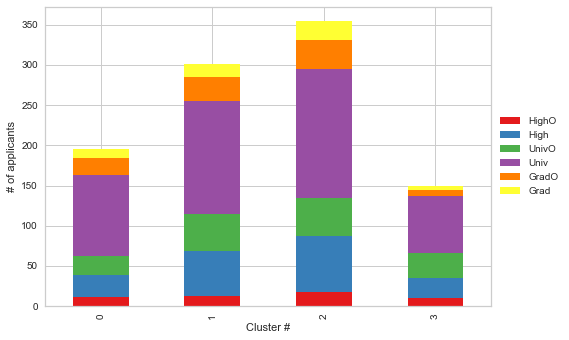

In [148]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

print(nums_ext.groupby(['Labels'], as_index=False).mean())

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

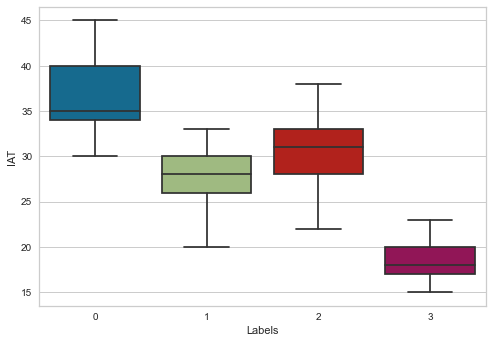

In [149]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

HDBSCAN

{0, 1, 2, 3, 4, -1}


/Users/jaichung/Documents/10_Work/codestates/.venv/lib/python3.9/site-packages/hdbscan/flat.py:155: UserWarning: Cannot predict more than 2 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "


ValueError: The palette list has the wrong number of colors.

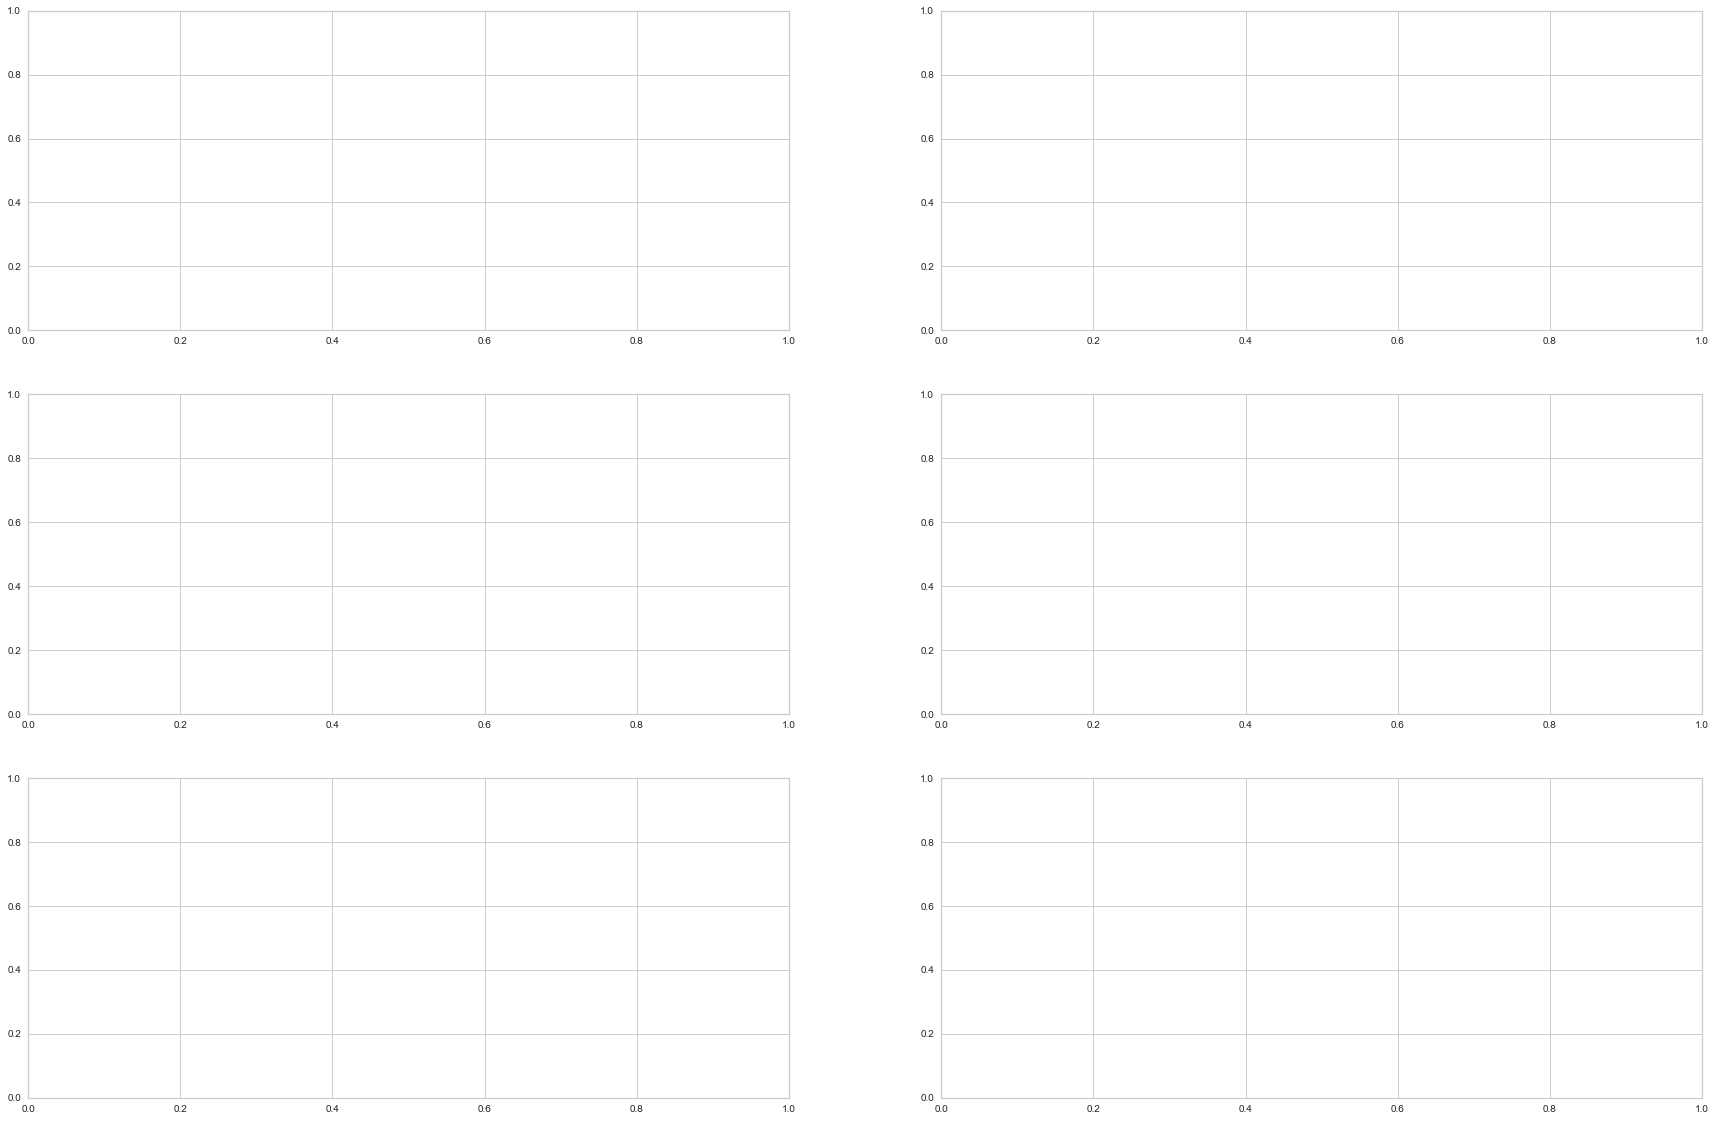

In [150]:
from hdbscan import flat
n_cls = 3
clusterer = flat.HDBSCAN_flat(X[['IAT', 'self', 'HPC', 'perf']], n_clusters=n_cls)
nums_ext['Labels'] = clusterer.labels_
print(set(list(clusterer.labels_)))
plotscat(nums_ext, n_cls + 1, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
-1         20    63     55   157     32    18
 0          0     0      2     7      1     0
 1          3     1      3    17      2     1
 2         29   114     89   290     60    36
   Labels        age        IAT      self        HPC       perf     major  \
0      -1  28.327536  28.428986  3.197101  11.121739  53.144928  0.069565   
1       0  29.000000  42.300000  2.900000  10.300000  58.500000  0.200000   
2       1  29.222222  17.740741  3.111111  10.666667  55.037037  0.037037   
3       2  28.530744  29.676375  2.886731  10.200647  52.500000  0.100324   

       work     sex_e   major_e    work_e  edu1_Grad  edu1_GradO  edu1_High  \
0  0.681159  0.481159  0.069565  0.681159   0.052174    0.092754   0.182609   
1  0.800000  0.200000  0.200000  0.800000   0.000000    0.100000   0.000000   
2  0.925926  0.555556  0.037037  0.925926   0.037037    0.074074   0.037037   
3  0.707120  0.529126 

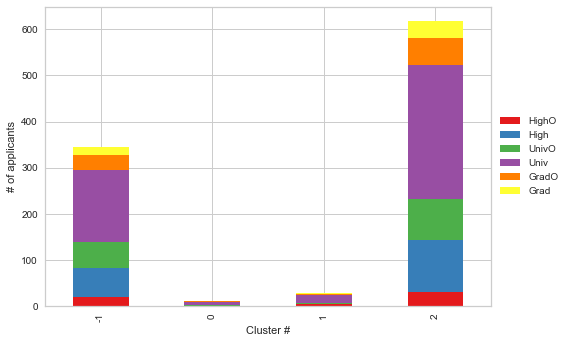

In [ ]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

print(nums_ext.groupby(['Labels'], as_index=False).mean())

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

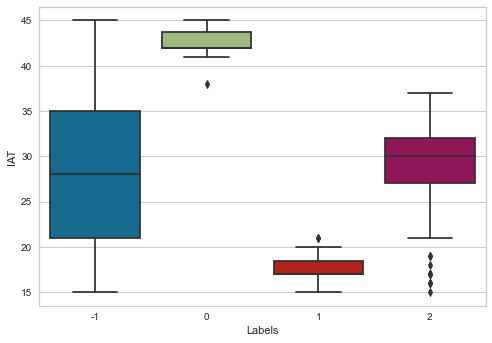

In [ ]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)